In [1]:
import pandas as pd

# Show full columns in outputs (avoid silent truncation)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

# World Bank CSVs usually have 4 metadata rows before headers
df_raw = pd.read_csv("API_IRQ_SE.PRM.ENRR_EN_csv_v2_200041.csv", skiprows=4)

print("Row count:", len(df_raw))
print("\nColumn names:")
print(df_raw.columns.tolist())

print("\nData types:")
print(df_raw.dtypes)

print("\nMissing values per column:")
print(df_raw.isna().sum())

# Preview first 10 rows to verify structure
df_raw.head(10)


Row count: 1

Column names:
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']

Data types:
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969             

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Iraq,IRQ,"School enrollment, primary (% gross)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.008301,70.535072,71.074982,72.551308,75.55542,84.7201,89.625893,90.67878,105.061981,107.95015,104.81778,102.983452,99.940887,100.355492,100.020622,101.291389,102.563957,103.563759,102.608788,NaN,111.210831,92.53376,91.171791,NaN,NaN,82.729271,NaN,NaN,92.750107,90.098938,NaN,NaN,96.083679,95.075439,NaN,NaN,103.738701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Drop metadata columns we don’t need
df_clean = df_raw.drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code", "Unnamed: 69"])

# Convert from wide to long format
df_clean = df_clean.melt(var_name="Year", value_name="Enrollment")

# Convert Year to numeric
df_clean["Year"] = pd.to_numeric(df_clean["Year"], errors="coerce")

# Drop rows where Enrollment is missing
df_clean = df_clean.dropna(subset=["Enrollment"])

# Sort by Year
df_clean = df_clean.sort_values("Year").reset_index(drop=True)

print("Row count after cleaning:", len(df_clean))
print("\nColumns:", df_clean.columns.tolist())
print("\nMissing values per column:\n", df_clean.isna().sum())

# Preview cleaned data
df_clean.head(15)


Row count after cleaning: 28

Columns: ['Year', 'Enrollment']

Missing values per column:
 Year          0
Enrollment    0
dtype: int64


,Year,Enrollment
0,1971,70.008301
1,1972,70.535072
2,1973,71.074982
3,1974,72.551308
4,1975,75.555420
5,1976,84.720100
6,1977,89.625893
7,1978,90.678780
8,1979,105.061981
9,1980,107.950150


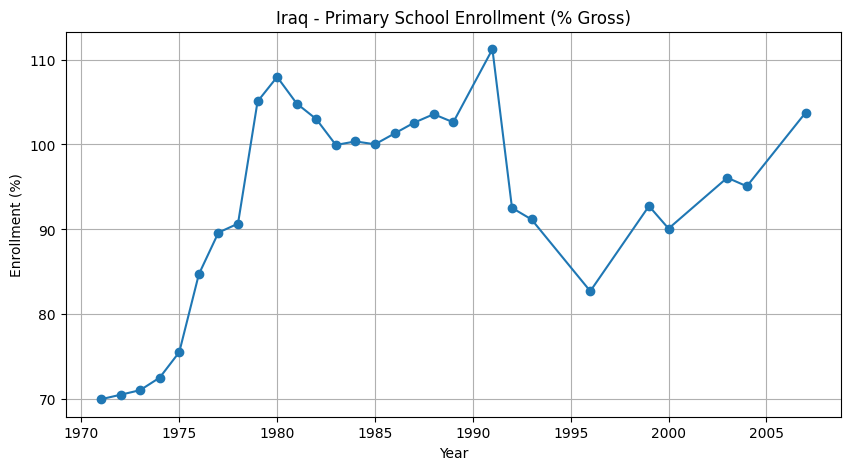

Highest enrollment: 111.210830688477 in year 1991
Lowest enrollment: 70.00830078125 in year 1971


In [3]:
import matplotlib.pyplot as plt

# Q1: Trend line plot
plt.figure(figsize=(10,5))
plt.plot(df_clean["Year"], df_clean["Enrollment"], marker="o")
plt.title("Iraq - Primary School Enrollment (% Gross)")
plt.xlabel("Year")
plt.ylabel("Enrollment (%)")
plt.grid(True)
plt.show()

# Q2: Highest enrollment year + value
max_row = df_clean.loc[df_clean["Enrollment"].idxmax()]
print("Highest enrollment:", max_row["Enrollment"], "in year", int(max_row["Year"]))

# Q3: Lowest enrollment year + value
min_row = df_clean.loc[df_clean["Enrollment"].idxmin()]
print("Lowest enrollment:", min_row["Enrollment"], "in year", int(min_row["Year"]))


In [4]:
# Make a rounded copy of the dataset
df_clean_rounded = df_clean.copy()
df_clean_rounded["Enrollment"] = df_clean_rounded["Enrollment"].round(2)

# Sanity check the first few rows
print(df_clean_rounded.head(10))

# Re-check highest and lowest with 2 decimal places
max_row = df_clean_rounded.loc[df_clean_rounded["Enrollment"].idxmax()]
print(f"Highest enrollment: {max_row['Enrollment']}% in year {int(max_row['Year'])}")

min_row = df_clean_rounded.loc[df_clean_rounded["Enrollment"].idxmin()]
print(f"Lowest enrollment: {min_row['Enrollment']}% in year {int(min_row['Year'])}")


   Year  Enrollment
0  1971       70.01
1  1972       70.54
2  1973       71.07
3  1974       72.55
4  1975       75.56
5  1976       84.72
6  1977       89.63
7  1978       90.68
8  1979      105.06
9  1980      107.95
Highest enrollment: 111.21% in year 1991
Lowest enrollment: 70.01% in year 1971


In [5]:
# Save the cleaned dataset (rounded, tidy format)
df_clean_rounded.to_csv("iraq_primary_enrollment_clean.csv", index=False)

print("Cleaned dataset saved as iraq_primary_enrollment_clean.csv")


Cleaned dataset saved as iraq_primary_enrollment_clean.csv


In [6]:
# Save the cleaned dataset
df_clean_rounded.to_csv("iraq_primary_enrollment_clean.csv", index=False)

# Save the line chart as PNG
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_clean_rounded["Year"], df_clean_rounded["Enrollment"], marker="o")
plt.title("Iraq - Primary School Enrollment (% Gross)")
plt.xlabel("Year")
plt.ylabel("Enrollment (%)")
plt.grid(True)

# Save image to project folder
plt.savefig("iraq_primary_enrollment_trend.png", dpi=300, bbox_inches="tight")
plt.close()

print("✅ Saved: iraq_primary_enrollment_clean.csv")
print("✅ Saved: iraq_primary_enrollment_trend.png")


✅ Saved: iraq_primary_enrollment_clean.csv
✅ Saved: iraq_primary_enrollment_trend.png


In [7]:
# Q4: Average enrollment across all years
avg_enrollment = df_clean_rounded["Enrollment"].mean().round(2)
print("Average enrollment across all years:", avg_enrollment, "%")

# Q5: Decade-by-decade average
df_clean_rounded["Decade"] = (df_clean_rounded["Year"] // 10) * 10
decade_avg = df_clean_rounded.groupby("Decade")["Enrollment"].mean().round(2)
print("\nDecade-by-decade average enrollment:")
print(decade_avg)

# Q6: Year-over-Year change
df_clean_rounded["YoY_change"] = df_clean_rounded["Enrollment"].diff().round(2)

# Largest increase
max_increase = df_clean_rounded.loc[df_clean_rounded["YoY_change"].idxmax()]
print("\nLargest increase:", max_increase["YoY_change"], "% in year", int(max_increase["Year"]))

# Largest drop
max_drop = df_clean_rounded.loc[df_clean_rounded["YoY_change"].idxmin()]
print("Largest drop:", max_drop["YoY_change"], "% in year", int(max_drop["Year"]))

# Preview table with YoY change
df_clean_rounded.head(15)


Average enrollment across all years: 93.26 %

Decade-by-decade average enrollment:
Decade
1970     81.09
1980    102.61
1990     94.08
2000     96.25
Name: Enrollment, dtype: float64

Largest increase: 14.38 % in year 1979
Largest drop: -18.68 % in year 1992


,Year,Enrollment,Decade,YoY_change
0,1971,70.01,1970,NaN
1,1972,70.54,1970,0.53
2,1973,71.07,1970,0.53
3,1974,72.55,1970,1.48
4,1975,75.56,1970,3.01
5,1976,84.72,1970,9.16
6,1977,89.63,1970,4.91
7,1978,90.68,1970,1.05
8,1979,105.06,1970,14.38
9,1980,107.95,1980,2.89


In [8]:
import matplotlib.pyplot as plt

# --- Visualization 1: Decade Averages ---
plt.figure(figsize=(8,5))
decade_avg.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Iraq - Primary School Enrollment (% Gross) by Decade")
plt.ylabel("Average Enrollment (%)")
plt.xlabel("Decade")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("iraq_enrollment_decade_avg.png", dpi=300)
plt.close()

# --- Visualization 2: Year-over-Year Change ---
plt.figure(figsize=(10,5))
plt.plot(df_clean_rounded["Year"], df_clean_rounded["YoY_change"], marker="o", linestyle="-", color="orange")
plt.axhline(0, color="gray", linewidth=1, linestyle="--")
plt.title("Iraq - Year-over-Year Change in Primary School Enrollment")
plt.xlabel("Year")
plt.ylabel("YoY Change (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("iraq_enrollment_yoy_change.png", dpi=300)
plt.close()

print("✅ Saved iraq_enrollment_decade_avg.png")
print("✅ Saved iraq_enrollment_yoy_change.png")


✅ Saved iraq_enrollment_decade_avg.png
✅ Saved iraq_enrollment_yoy_change.png


In [9]:
# Save enriched dataset with decade averages + YoY change
df_clean_rounded.to_csv("iraq_primary_enrollment_q4_q6.csv", index=False)

print("✅ Saved iraq_primary_enrollment_q4_q6.csv")


✅ Saved iraq_primary_enrollment_q4_q6.csv


In [10]:
import numpy as np
from scipy.stats import linregress

# Q7: Long-term trend slope (linear regression)
slope, intercept, r_value, p_value, std_err = linregress(df_clean_rounded["Year"], df_clean_rounded["Enrollment"])
trend_direction = "increasing" if slope > 0 else "decreasing"
print(f"Q7: Long-term trend slope = {slope:.2f} per year ({trend_direction})")

# Q8: Median vs Mean
mean_val = df_clean_rounded["Enrollment"].mean().round(2)
median_val = df_clean_rounded["Enrollment"].median().round(2)
print(f"Q8: Mean enrollment = {mean_val}%, Median enrollment = {median_val}%")

# Q9: Recovery after 1992 drop
drop_year = 1992
drop_value = df_clean_rounded.loc[df_clean_rounded["Year"] == drop_year, "Enrollment"].values[0]
# Find first year after 1992 where enrollment >= drop_value
recovery = df_clean_rounded.loc[(df_clean_rounded["Year"] > drop_year) & 
                                (df_clean_rounded["Enrollment"] >= drop_value), "Year"]
if not recovery.empty:
    recovery_year = int(recovery.iloc[0])
    recovery_time = recovery_year - drop_year
    print(f"Q9: Enrollment recovered by {recovery_year}, {recovery_time} years after the 1992 drop.")
else:
    print("Q9: Enrollment has not yet fully recovered to the 1992 level.")


Q7: Long-term trend slope = 0.52 per year (increasing)
Q8: Mean enrollment = 93.26%, Median enrollment = 95.58%
Q9: Enrollment recovered by 1999, 7 years after the 1992 drop.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- Q7: compute simple linear trend using numpy (avoids extra installs) ---
slope, intercept = np.polyfit(df_clean_rounded["Year"], df_clean_rounded["Enrollment"], 1)
df_q7q9 = df_clean_rounded.copy()
df_q7q9["Trend_Pred"] = (slope * df_q7q9["Year"] + intercept).round(2)
df_q7q9["Residual"] = (df_q7q9["Enrollment"] - df_q7q9["Trend_Pred"]).round(2)

# --- Q8: mean vs median (already computed, but we’ll reuse here for visuals/labels) ---
mean_val = df_q7q9["Enrollment"].mean().round(2)
median_val = df_q7q9["Enrollment"].median().round(2)

# --- Q9: recovery after 1992 drop ---
drop_year = 1992
drop_value = df_q7q9.loc[df_q7q9["Year"] == drop_year, "Enrollment"].values[0]
recovery = df_q7q9.loc[(df_q7q9["Year"] > drop_year) & 
                       (df_q7q9["Enrollment"] >= drop_value), "Year"]
recovered = not recovery.empty
recovery_year = int(recovery.iloc[0]) if recovered else None

# Save enriched CSV for Q7–Q9
df_q7q9.to_csv("iraq_primary_enrollment_q7_q9.csv", index=False)

# --- Viz 1: Trend with regression line ---
plt.figure(figsize=(10,5))
plt.plot(df_q7q9["Year"], df_q7q9["Enrollment"], marker="o", label="Enrollment")
plt.plot(df_q7q9["Year"], df_q7q9["Trend_Pred"], linestyle="--", label=f"Trend (slope {slope:.2f}/yr)")
plt.title("Iraq - Primary Enrollment (% Gross) with Trend Line")
plt.xlabel("Year"); plt.ylabel("Enrollment (%)")
plt.grid(True); plt.legend()
plt.tight_layout()
plt.savefig("iraq_enrollment_trend_with_regression.png", dpi=300)
plt.close()

# --- Viz 2: Distribution with mean vs median ---
plt.figure(figsize=(8,5))
plt.hist(df_q7q9["Enrollment"], bins=10)
plt.axvline(mean_val, linestyle="--", label=f"Mean {mean_val}%")
plt.axvline(median_val, linestyle="-.", label=f"Median {median_val}%")
plt.title("Distribution of Primary Enrollment (% Gross)")
plt.xlabel("Enrollment (%)"); plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7); plt.legend()
plt.tight_layout()
plt.savefig("iraq_enrollment_mean_median_hist.png", dpi=300)
plt.close()

# --- Viz 3: Recovery annotation (1992 -> recovery year) ---
plt.figure(figsize=(10,5))
plt.plot(df_q7q9["Year"], df_q7q9["Enrollment"], marker="o")
plt.axvline(1992, linestyle="--")
if recovered:
    plt.axvline(recovery_year, linestyle="--")
    plt.annotate(f"Recovery by {recovery_year}",
                 xy=(recovery_year, df_q7q9.loc[df_q7q9["Year"]==recovery_year,"Enrollment"].values[0]),
                 xytext=(recovery_year+1, df_q7q9["Enrollment"].max()-3),
                 arrowprops=dict(arrowstyle="->"))
plt.title("Recovery After 1992 Drop — Primary Enrollment")
plt.xlabel("Year"); plt.ylabel("Enrollment (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("iraq_enrollment_recovery_1992_to_1999.png", dpi=300)
plt.close()

print("✅ Saved: iraq_primary_enrollment_q7_q9.csv")
print("✅ Saved: iraq_enrollment_trend_with_regression.png")
print("✅ Saved: iraq_enrollment_mean_median_hist.png")
print("✅ Saved: iraq_enrollment_recovery_1992_to_1999.png")
print(f"(Trend slope: {slope:.2f} per year; Mean {mean_val}%, Median {median_val}% ; Recovery year: {recovery_year})")


✅ Saved: iraq_primary_enrollment_q7_q9.csv
✅ Saved: iraq_enrollment_trend_with_regression.png
✅ Saved: iraq_enrollment_mean_median_hist.png
✅ Saved: iraq_enrollment_recovery_1992_to_1999.png
(Trend slope: 0.52 per year; Mean 93.26%, Median 95.58% ; Recovery year: 1999)


In [12]:
import matplotlib.pyplot as plt

# Recompute core stats (rounded DataFrame already exists)
max_row = df_clean_rounded.loc[df_clean_rounded["Enrollment"].idxmax()]
min_row = df_clean_rounded.loc[df_clean_rounded["Enrollment"].idxmin()]
avg_enrollment = df_clean_rounded["Enrollment"].mean().round(2)

max_year, max_val = int(max_row["Year"]), float(max_row["Enrollment"])
min_year, min_val = int(min_row["Year"]), float(min_row["Enrollment"])

# --- Viz A (Q2+Q3): Highest vs Lowest Bar Chart ---
plt.figure(figsize=(6,5))
plt.bar([f"Highest\n{max_year}", f"Lowest\n{min_year}"], [max_val, min_val])
plt.title("Iraq Primary Enrollment — Highest vs Lowest Years")
plt.ylabel("Enrollment (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("results/iraq_enrollment_highest_lowest_bar.png", dpi=300)
plt.close()

# --- Viz B (Q4): Trend with Mean Line ---
plt.figure(figsize=(10,5))
plt.plot(df_clean_rounded["Year"], df_clean_rounded["Enrollment"], marker="o")
plt.axhline(avg_enrollment, linestyle="--", label=f"Average = {avg_enrollment}%")
plt.title("Iraq Primary Enrollment — Trend with Overall Average")
plt.xlabel("Year"); plt.ylabel("Enrollment (%)")
plt.grid(True); plt.legend()
plt.tight_layout()
plt.savefig("results/iraq_enrollment_trend_with_mean.png", dpi=300)
plt.close()

# --- Viz C (Q4): Simple 'Card' image for Average ---
fig = plt.figure(figsize=(6,3))
plt.axis("off")
plt.text(0.5, 0.5, f"Average Enrollment\n{avg_enrollment}%", ha="center", va="center", fontsize=24)
plt.tight_layout()
plt.savefig("results/iraq_enrollment_average_card.png", dpi=300)
plt.close()

print("✅ Saved: results/iraq_enrollment_highest_lowest_bar.png")
print("✅ Saved: results/iraq_enrollment_trend_with_mean.png")
print("✅ Saved: results/iraq_enrollment_average_card.png")


✅ Saved: results/iraq_enrollment_highest_lowest_bar.png
✅ Saved: results/iraq_enrollment_trend_with_mean.png
✅ Saved: results/iraq_enrollment_average_card.png


In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Compute pre-1990 vs post-1990 averages
pre_1990 = df_clean_rounded.loc[df_clean_rounded["Year"] < 1990, "Enrollment"].mean().round(2)
post_1990 = df_clean_rounded.loc[df_clean_rounded["Year"] >= 1990, "Enrollment"].mean().round(2)

# Save results to CSV
b1_df = pd.DataFrame({
    "Period": ["Before 1990", "1990 and After"],
    "Average Enrollment": [pre_1990, post_1990]
})
b1_df.to_csv("results/bonus_insights/B1_pre_post_1990_comparison.csv", index=False)

# Bar chart
plt.figure(figsize=(6,5))
plt.bar(b1_df["Period"], b1_df["Average Enrollment"], color=["steelblue","orange"])
plt.title("Iraq Enrollment — Before vs After 1990")
plt.ylabel("Average Enrollment (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("results/bonus_insights/B1_pre_post_1990_comparison.png", dpi=300)
plt.close()

print("✅ Saved: B1_pre_post_1990_comparison.csv")
print("✅ Saved: B1_pre_post_1990_comparison.png")
print(f"Before 1990 average = {pre_1990}%, After 1990 average = {post_1990}%")


✅ Saved: B1_pre_post_1990_comparison.csv
✅ Saved: B1_pre_post_1990_comparison.png
Before 1990 average = 92.42%, After 1990 average = 95.04%


In [14]:
import numpy as np

# Identify first valid year and peak year
first_year = int(df_clean_rounded["Year"].iloc[0])
first_value = float(df_clean_rounded["Enrollment"].iloc[0])
peak_row = df_clean_rounded.loc[df_clean_rounded["Enrollment"].idxmax()]
peak_year = int(peak_row["Year"])
peak_value = float(peak_row["Enrollment"])

# Calculate CAGR
years_diff = peak_year - first_year
cagr = ((peak_value / first_value) ** (1/years_diff) - 1) * 100

# Save to CSV
b2_df = pd.DataFrame({
    "Start Year": [first_year],
    "Start Value": [round(first_value,2)],
    "Peak Year": [peak_year],
    "Peak Value": [round(peak_value,2)],
    "Years": [years_diff],
    "CAGR (%)": [round(cagr,2)]
})
b2_df.to_csv("results/bonus_insights/B2_cagr_to_peak.csv", index=False)

# Visualization: CAGR line
plt.figure(figsize=(8,5))
plt.plot([first_year, peak_year], [first_value, peak_value], marker="o", color="green", label=f"CAGR {cagr:.2f}%/yr")
plt.title("Iraq Primary Enrollment — CAGR to Peak")
plt.xlabel("Year"); plt.ylabel("Enrollment (%)")
plt.grid(True); plt.legend()
plt.tight_layout()
plt.savefig("results/bonus_insights/B2_cagr_to_peak.png", dpi=300)
plt.close()

print("✅ Saved: B2_cagr_to_peak.csv")
print("✅ Saved: B2_cagr_to_peak.png")
print(f"From {first_year} ({first_value:.2f}%) to {peak_year} ({peak_value:.2f}%) over {years_diff} years → CAGR = {cagr:.2f}% per year")


✅ Saved: B2_cagr_to_peak.csv
✅ Saved: B2_cagr_to_peak.png
From 1971 (70.01%) to 1991 (111.21%) over 20 years → CAGR = 2.34% per year


In [16]:
# Calculate volatility per decade
decade_volatility = df_clean_rounded.groupby("Decade")["Enrollment"].std().round(2)

# Identify most & least volatile
most_volatile_decade = decade_volatility.idxmax()
least_volatile_decade = decade_volatility.idxmin()

# Save to CSV
b3_df = decade_volatility.reset_index().rename(columns={"Enrollment": "StdDev_Enrollment"})
b3_df.to_csv("results/bonus_insights/B3_decade_volatility.csv", index=False)

# Visualization: volatility bar chart
plt.figure(figsize=(8,5))
decade_volatility.plot(kind="bar", color="purple", edgecolor="black")
plt.title("Iraq Enrollment Volatility (Std Dev) by Decade")
plt.ylabel("Standard Deviation of Enrollment (%)")
plt.xlabel("Decade")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("results/bonus_insights/B3_decade_volatility.png", dpi=300)
plt.close()

print("✅ Saved: B3_decade_volatility.csv")
print("✅ Saved: B3_decade_volatility.png")
print("Most volatile decade:", most_volatile_decade)
print("Least volatile decade:", least_volatile_decade)


✅ Saved: B3_decade_volatility.csv
✅ Saved: B3_decade_volatility.png
Most volatile decade: 1970
Least volatile decade: 1980


In [17]:
# Extract 1991 (peak) and 1992 (drop) values
peak_year = 1991
drop_year = 1992
peak_value = df_clean_rounded.loc[df_clean_rounded["Year"] == peak_year, "Enrollment"].values[0]
drop_value = df_clean_rounded.loc[df_clean_rounded["Year"] == drop_year, "Enrollment"].values[0]

# Calculate absolute and percentage drop
abs_drop = round(peak_value - drop_value, 2)
pct_drop = round((abs_drop / peak_value) * 100, 2)

# Save to CSV
b4_df = pd.DataFrame({
    "Year": [peak_year, drop_year],
    "Enrollment": [peak_value, drop_value],
    "Absolute_Drop": [abs_drop, None],
    "Percent_Drop": [pct_drop, None]
})
b4_df.to_csv("results/bonus_insights/B4_peak_to_drop.csv", index=False)

# Visualization
plt.figure(figsize=(6,5))
plt.bar([peak_year, drop_year], [peak_value, drop_value], color=["green","red"], width=0.6)
plt.title("Iraq Enrollment Drop: 1991 (Peak) → 1992 (Crisis)")
plt.ylabel("Enrollment (%)")
plt.xlabel("Year")
for x,y in zip([peak_year, drop_year], [peak_value, drop_value]):
    plt.text(x, y+1, f"{y:.2f}%", ha="center", fontsize=9)
plt.tight_layout()
plt.savefig("results/bonus_insights/B4_peak_to_drop.png", dpi=300)
plt.close()

print("✅ Saved: B4_peak_to_drop.csv")
print("✅ Saved: B4_peak_to_drop.png")
print(f"Drop from {peak_year} to {drop_year}: {abs_drop} points ({pct_drop}%)")


✅ Saved: B4_peak_to_drop.csv
✅ Saved: B4_peak_to_drop.png
Drop from 1991 to 1992: 18.68 points (16.8%)


In [18]:
# Recovery analysis: 1992 -> 1999 recovery
recovery_year = 1999
recovery_value = df_clean_rounded.loc[df_clean_rounded["Year"] == recovery_year, "Enrollment"].values[0]

# Resilience index = Drop Magnitude ÷ Recovery Time
recovery_time = recovery_year - drop_year
resilience_index = round(abs_drop / recovery_time, 2)

# Save to CSV
b5_df = pd.DataFrame({
    "Drop_Year": [drop_year],
    "Recovery_Year": [recovery_year],
    "Drop_Magnitude": [abs_drop],
    "Recovery_Time_Years": [recovery_time],
    "Resilience_Index": [resilience_index]
})
b5_df.to_csv("results/bonus_insights/B5_resilience_index.csv", index=False)

# Visualization
subset = df_clean_rounded[(df_clean_rounded["Year"] >= 1991) & (df_clean_rounded["Year"] <= 1999)]
plt.figure(figsize=(8,5))
plt.plot(subset["Year"], subset["Enrollment"], marker="o", linestyle="-", color="blue")
plt.axvline(drop_year, color="red", linestyle="--", label="1992 Drop")
plt.axvline(recovery_year, color="green", linestyle="--", label="1999 Recovery")
plt.title("Iraq Enrollment Recovery: 1991 → 1999")
plt.ylabel("Enrollment (%)")
plt.xlabel("Year")
plt.legend()
for x,y in zip(subset["Year"], subset["Enrollment"]):
    plt.text(x, y+1, f"{y:.2f}", ha="center", fontsize=8)
plt.tight_layout()
plt.savefig("results/bonus_insights/B5_resilience_index.png", dpi=300)
plt.close()

print("✅ Saved: B5_resilience_index.csv")
print("✅ Saved: B5_resilience_index.png")
print(f"Resilience Index = {resilience_index} points recovered per year")


✅ Saved: B5_resilience_index.csv
✅ Saved: B5_resilience_index.png
Resilience Index = 2.67 points recovered per year


In [20]:
import os
import csv
from pathlib import Path

base = Path(r"C:\Users\Ibrahim\Iraq_Data_Portfolio\results")

# Friendly descriptions per filename (kept simple + readable)
descriptions = {
    # main CSVs
    "iraq_primary_enrollment_clean.csv": "Clean tidy dataset (Year, Enrollment) used for trend/highest/lowest",
    "iraq_enrollment_growth_metrics.csv": "Growth metrics (decade averages + YoY change)",
    "iraq_enrollment_statistics.csv": "Stats used for regression line, mean/median, and recovery checks",

    # main PNGs
    "enrollment_trend.png": "Overall trend of enrollment over time",
    "enrollment_trend_regression.png": "Trend with linear regression line (slope)",
    "enrollment_trend_with_mean.png": "Trend with overall average line",
    "enrollment_highest_lowest.png": "Bar chart for highest vs lowest years",
    "enrollment_decade_average.png": "Bar chart of average enrollment by decade",
    "enrollment_yoy_change.png": "Year-over-year change line chart",
    "enrollment_average.png": "Card-style image showing overall average",
    "enrollment_distribution.png": "Histogram showing mean vs median distribution",
    "enrollment_recovery_1992_1999.png": "Recovery from 1992 drop highlighted",

    # bonus CSVs
    "enrollment_pre_post_1990.csv": "Bonus: average before 1990 vs 1990+",
    "enrollment_cagr_peak.csv": "Bonus: CAGR from first valid year to peak year",
    "enrollment_decade_volatility.csv": "Bonus: volatility (std dev) by decade",
    "enrollment_peak_drop.csv": "Bonus: peak (1991) to drop (1992) magnitude",
    "enrollment_resilience_index.csv": "Bonus: drop magnitude per recovery year (resilience)",

    # bonus PNGs
    "enrollment_pre_post_1990.png": "Bonus visual: before vs after 1990 comparison",
    "enrollment_cagr_peak.png": "Bonus visual: CAGR to peak",
    "enrollment_decade_volatility.png": "Bonus visual: decade volatility (std dev)",
    "enrollment_peak_drop.png": "Bonus visual: 1991→1992 peak-to-drop",
    "enrollment_resilience.png": "Bonus visual: annotated recovery and resilience",
}

rows = []
# Walk results and bonus_insights
for folder in [base, base / "bonus_insights"]:
    for fname in sorted(os.listdir(folder)):
        fpath = folder / fname
        if fpath.is_file():
            ext = fpath.suffix.lower()
            ftype = "CSV" if ext == ".csv" else ("PNG" if ext == ".png" else f"{ext.upper()} file")
            # Look up description; fallback to filename if not found
            desc = descriptions.get(fname, f"File: {fname}")
            # Relative path from results/
            rel = fpath.relative_to(base).as_posix()
            rows.append([rel, ftype, desc])

# Write MANIFEST.csv into results/
manifest_path = base / "MANIFEST.csv"
with open(manifest_path, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["path", "type", "description"])
    writer.writerows(rows)

print(f"✅ Wrote manifest: {manifest_path}")


✅ Wrote manifest: C:\Users\Ibrahim\Iraq_Data_Portfolio\results\MANIFEST.csv


# 📷 Visual Gallery (Core 9)

### Overall Trend

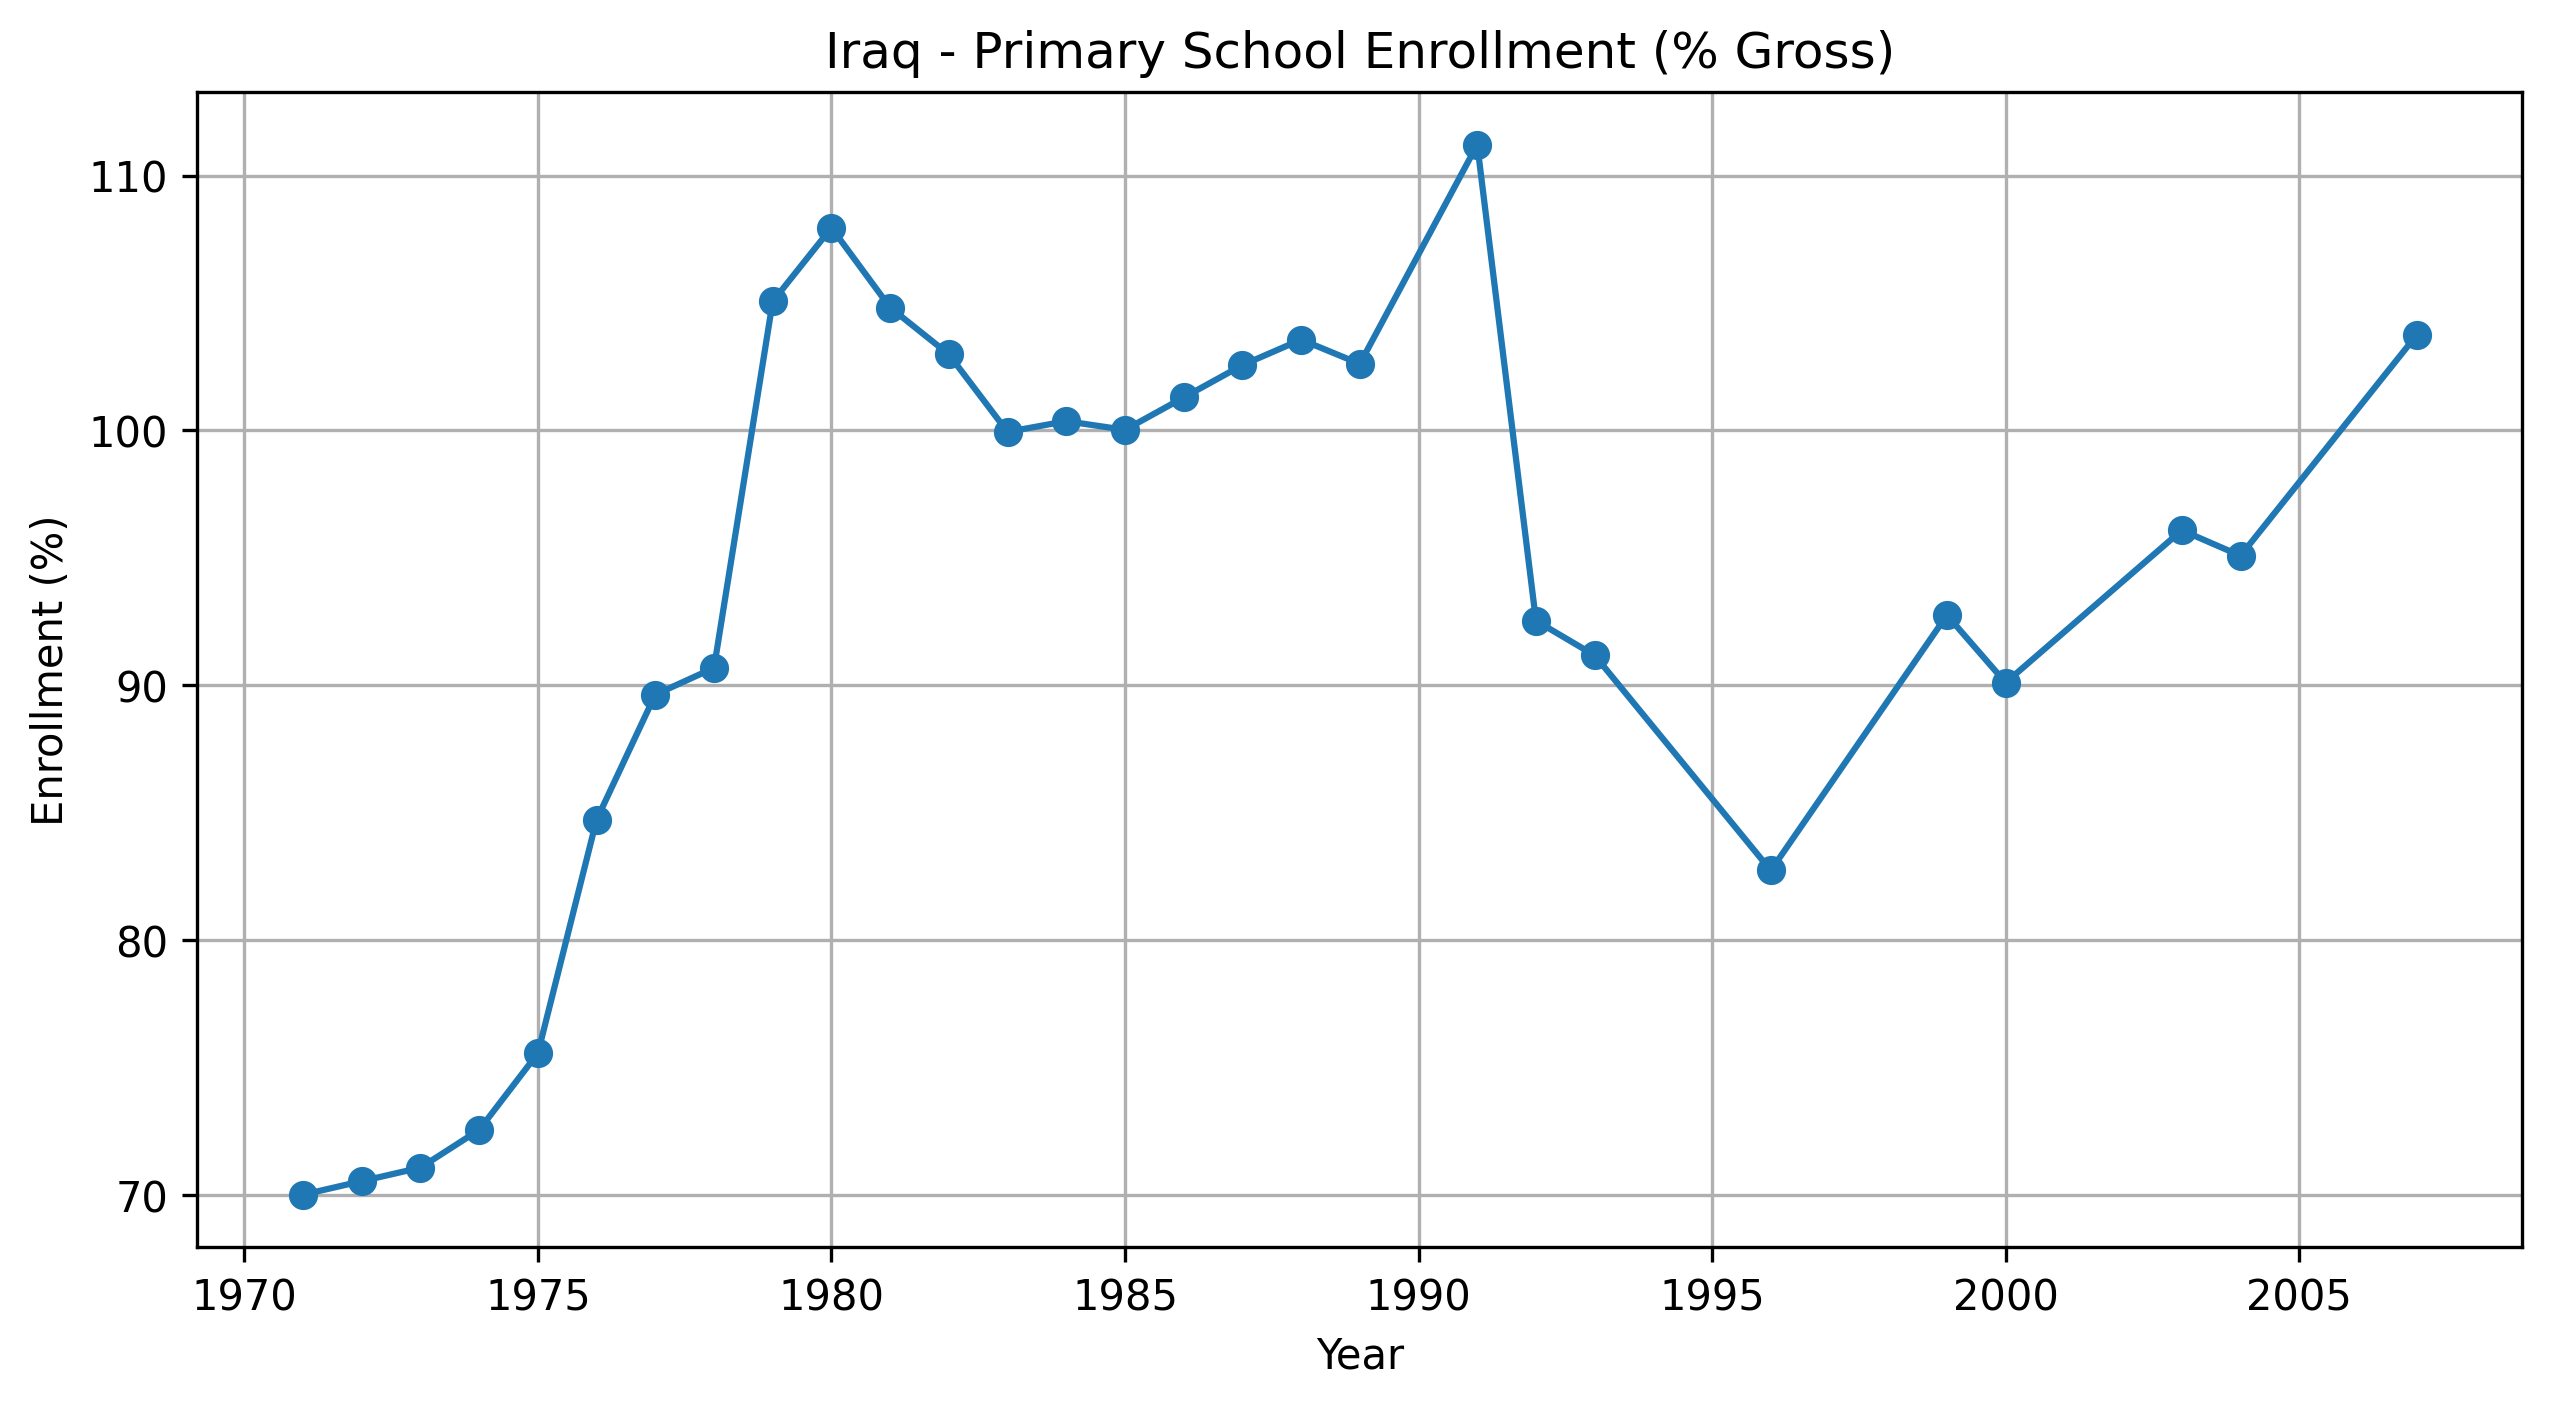

*Iraq primary enrollment (% gross) over time.*

---

### Trend with Regression

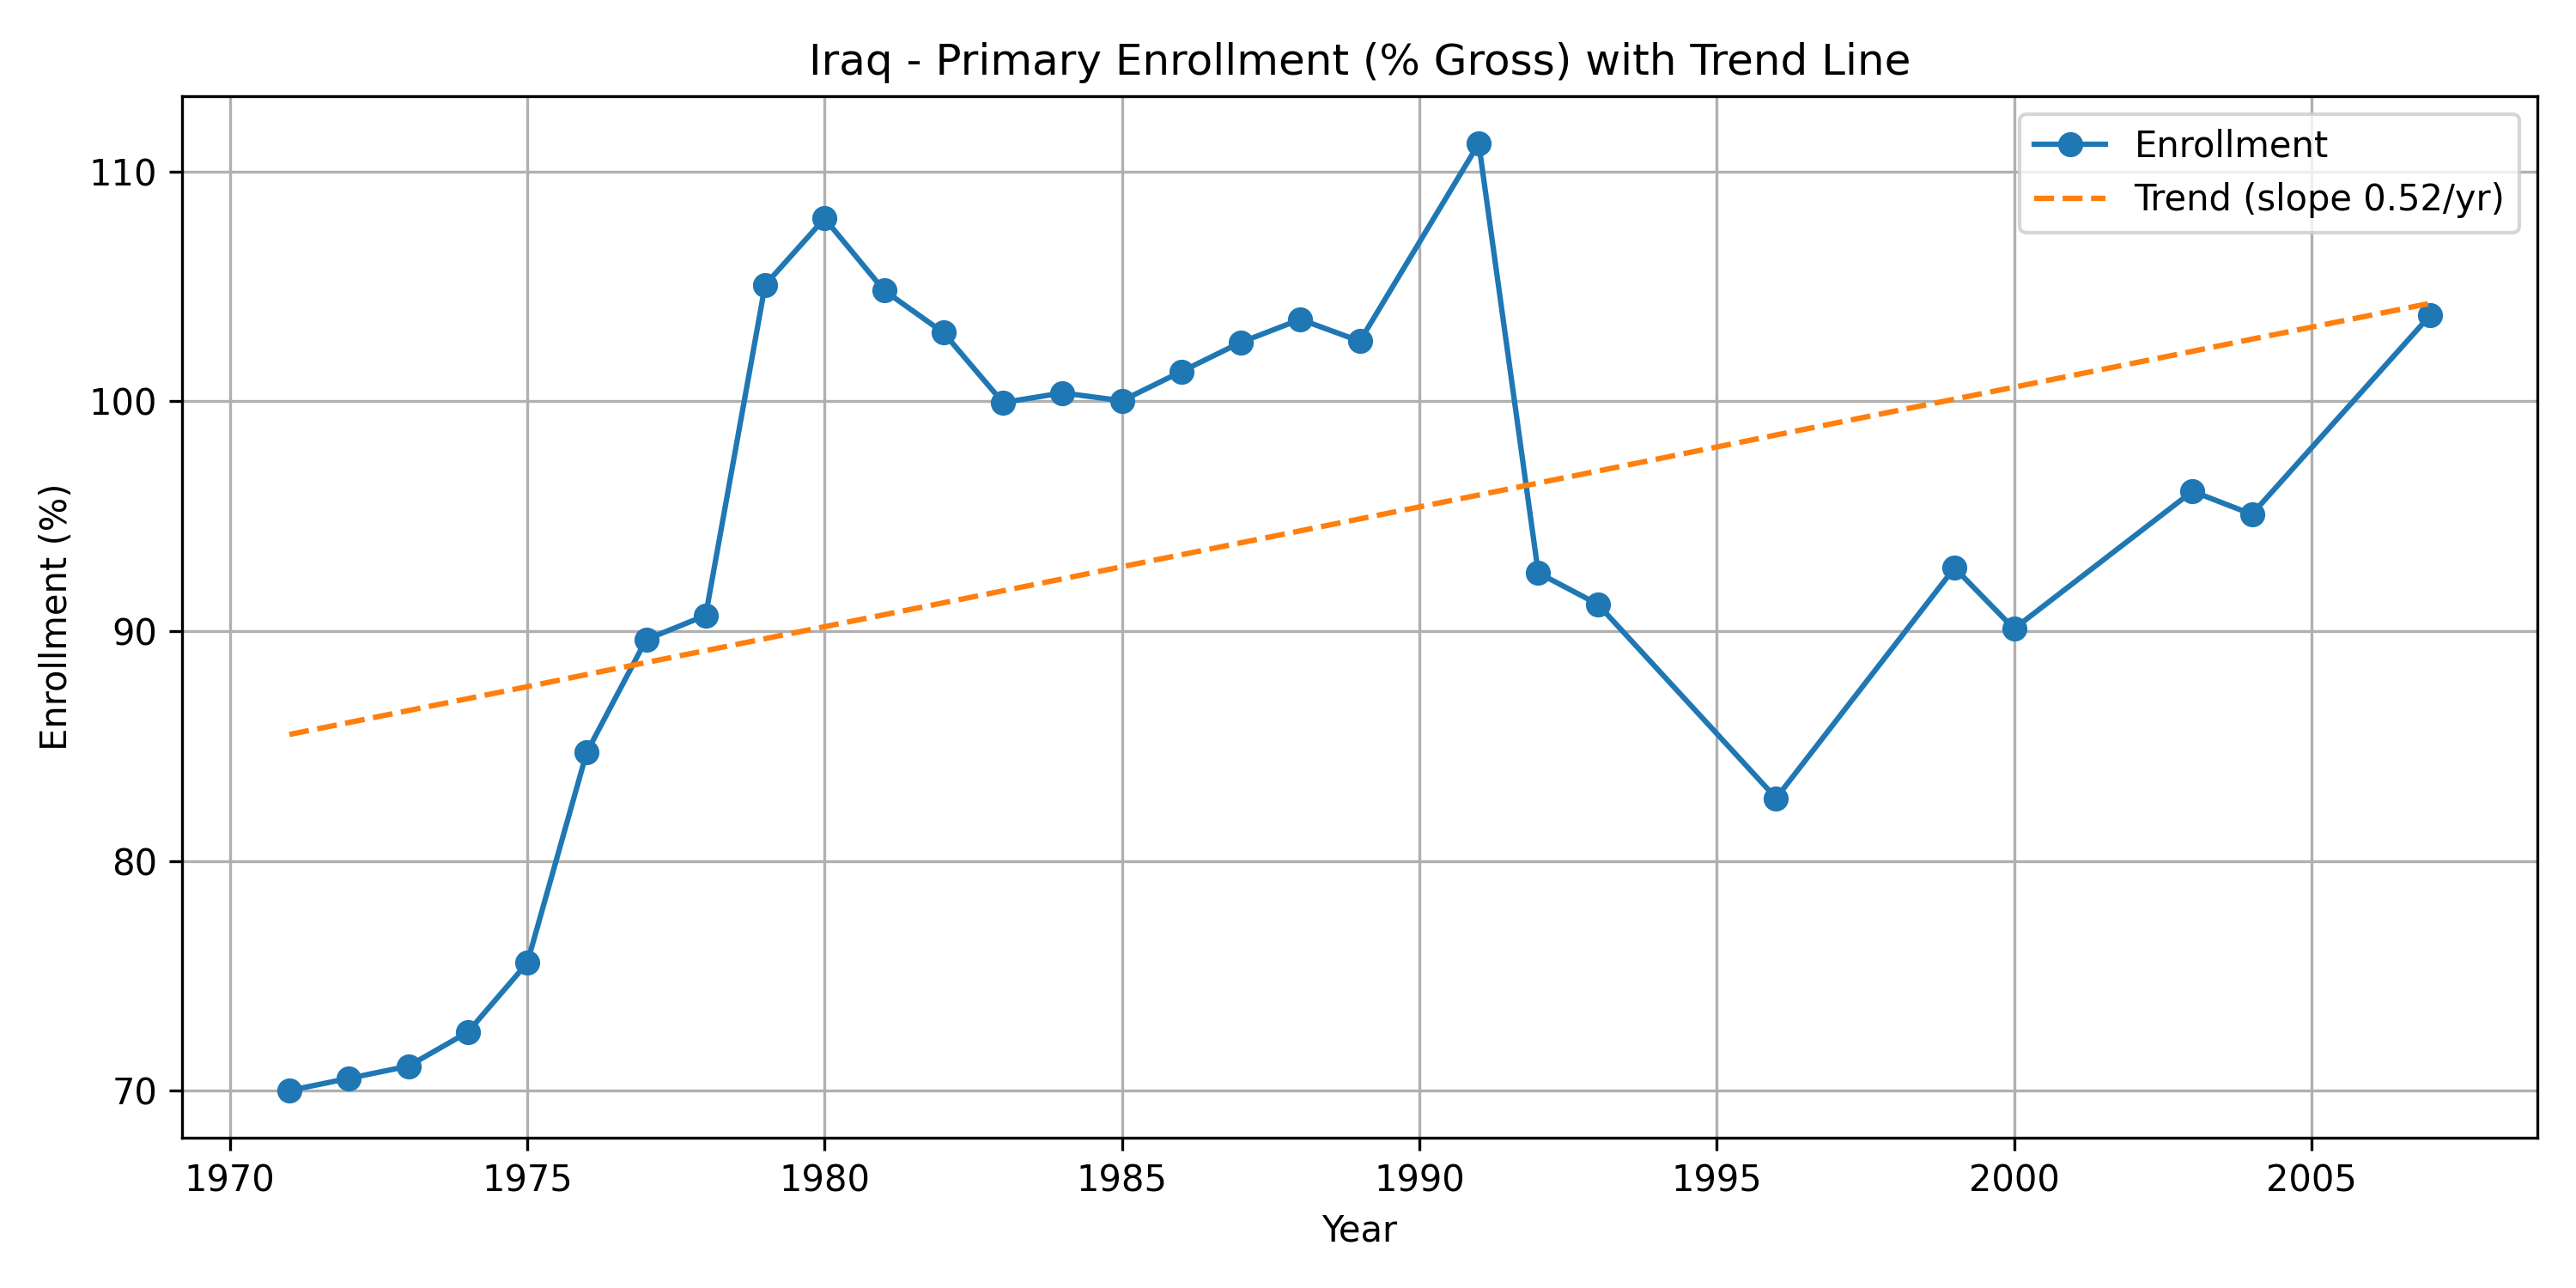

*Linear trend line (slope).*

---

### Trend with Mean Line

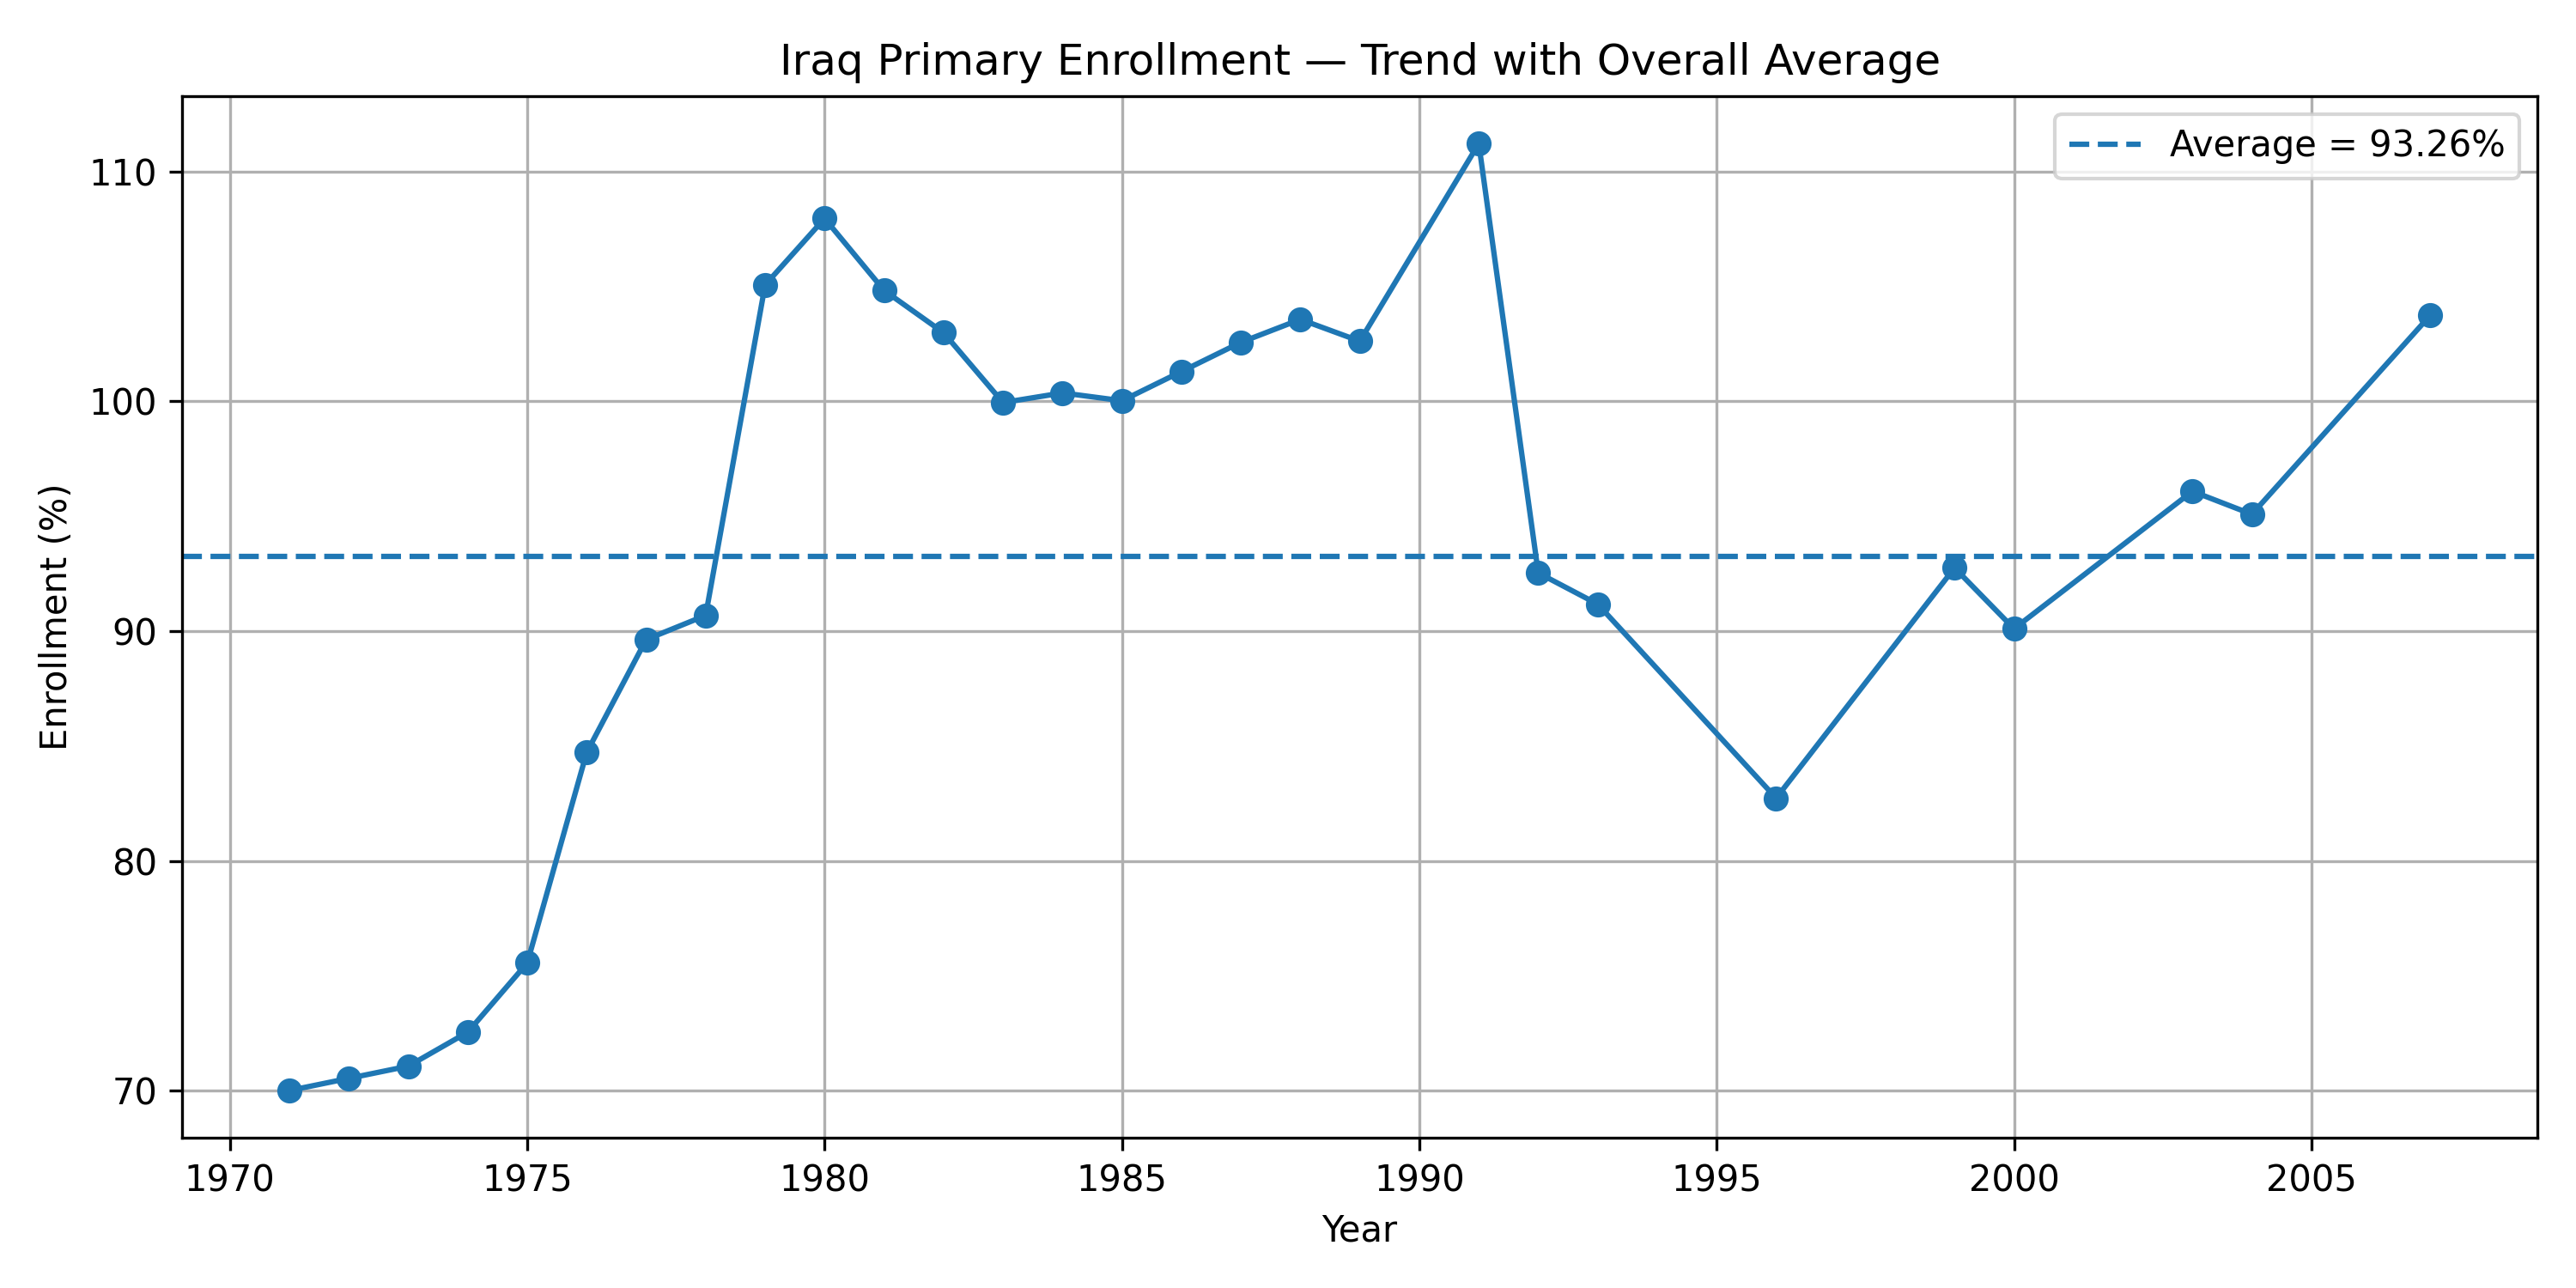

*Overall average across all years.*

---

### Highest vs Lowest Years

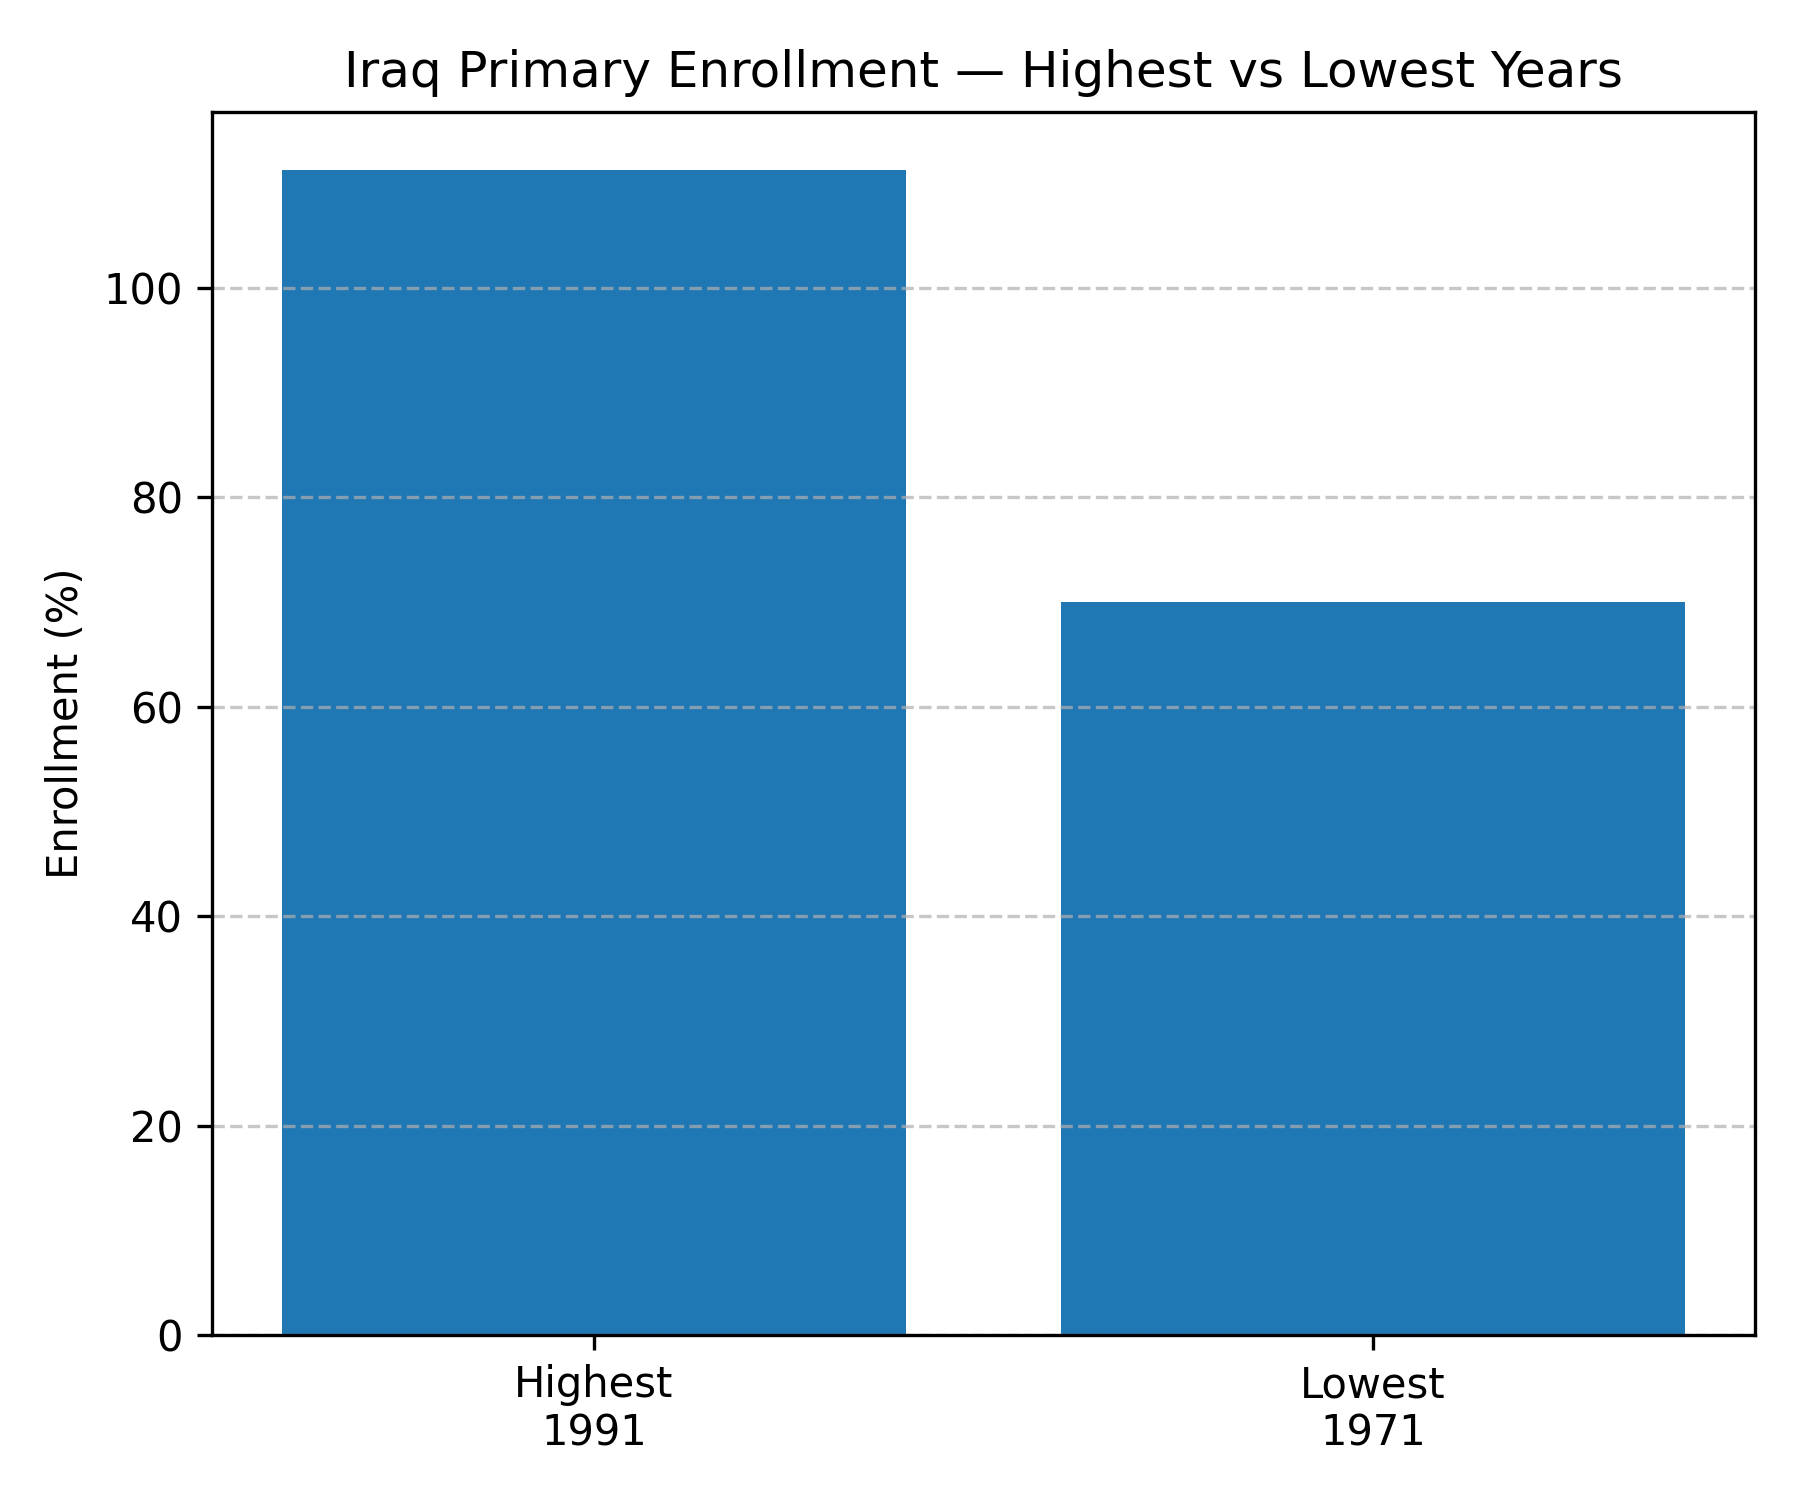

*Peak 1991 vs trough 1971 in this dataset.*

---

### Decade Average

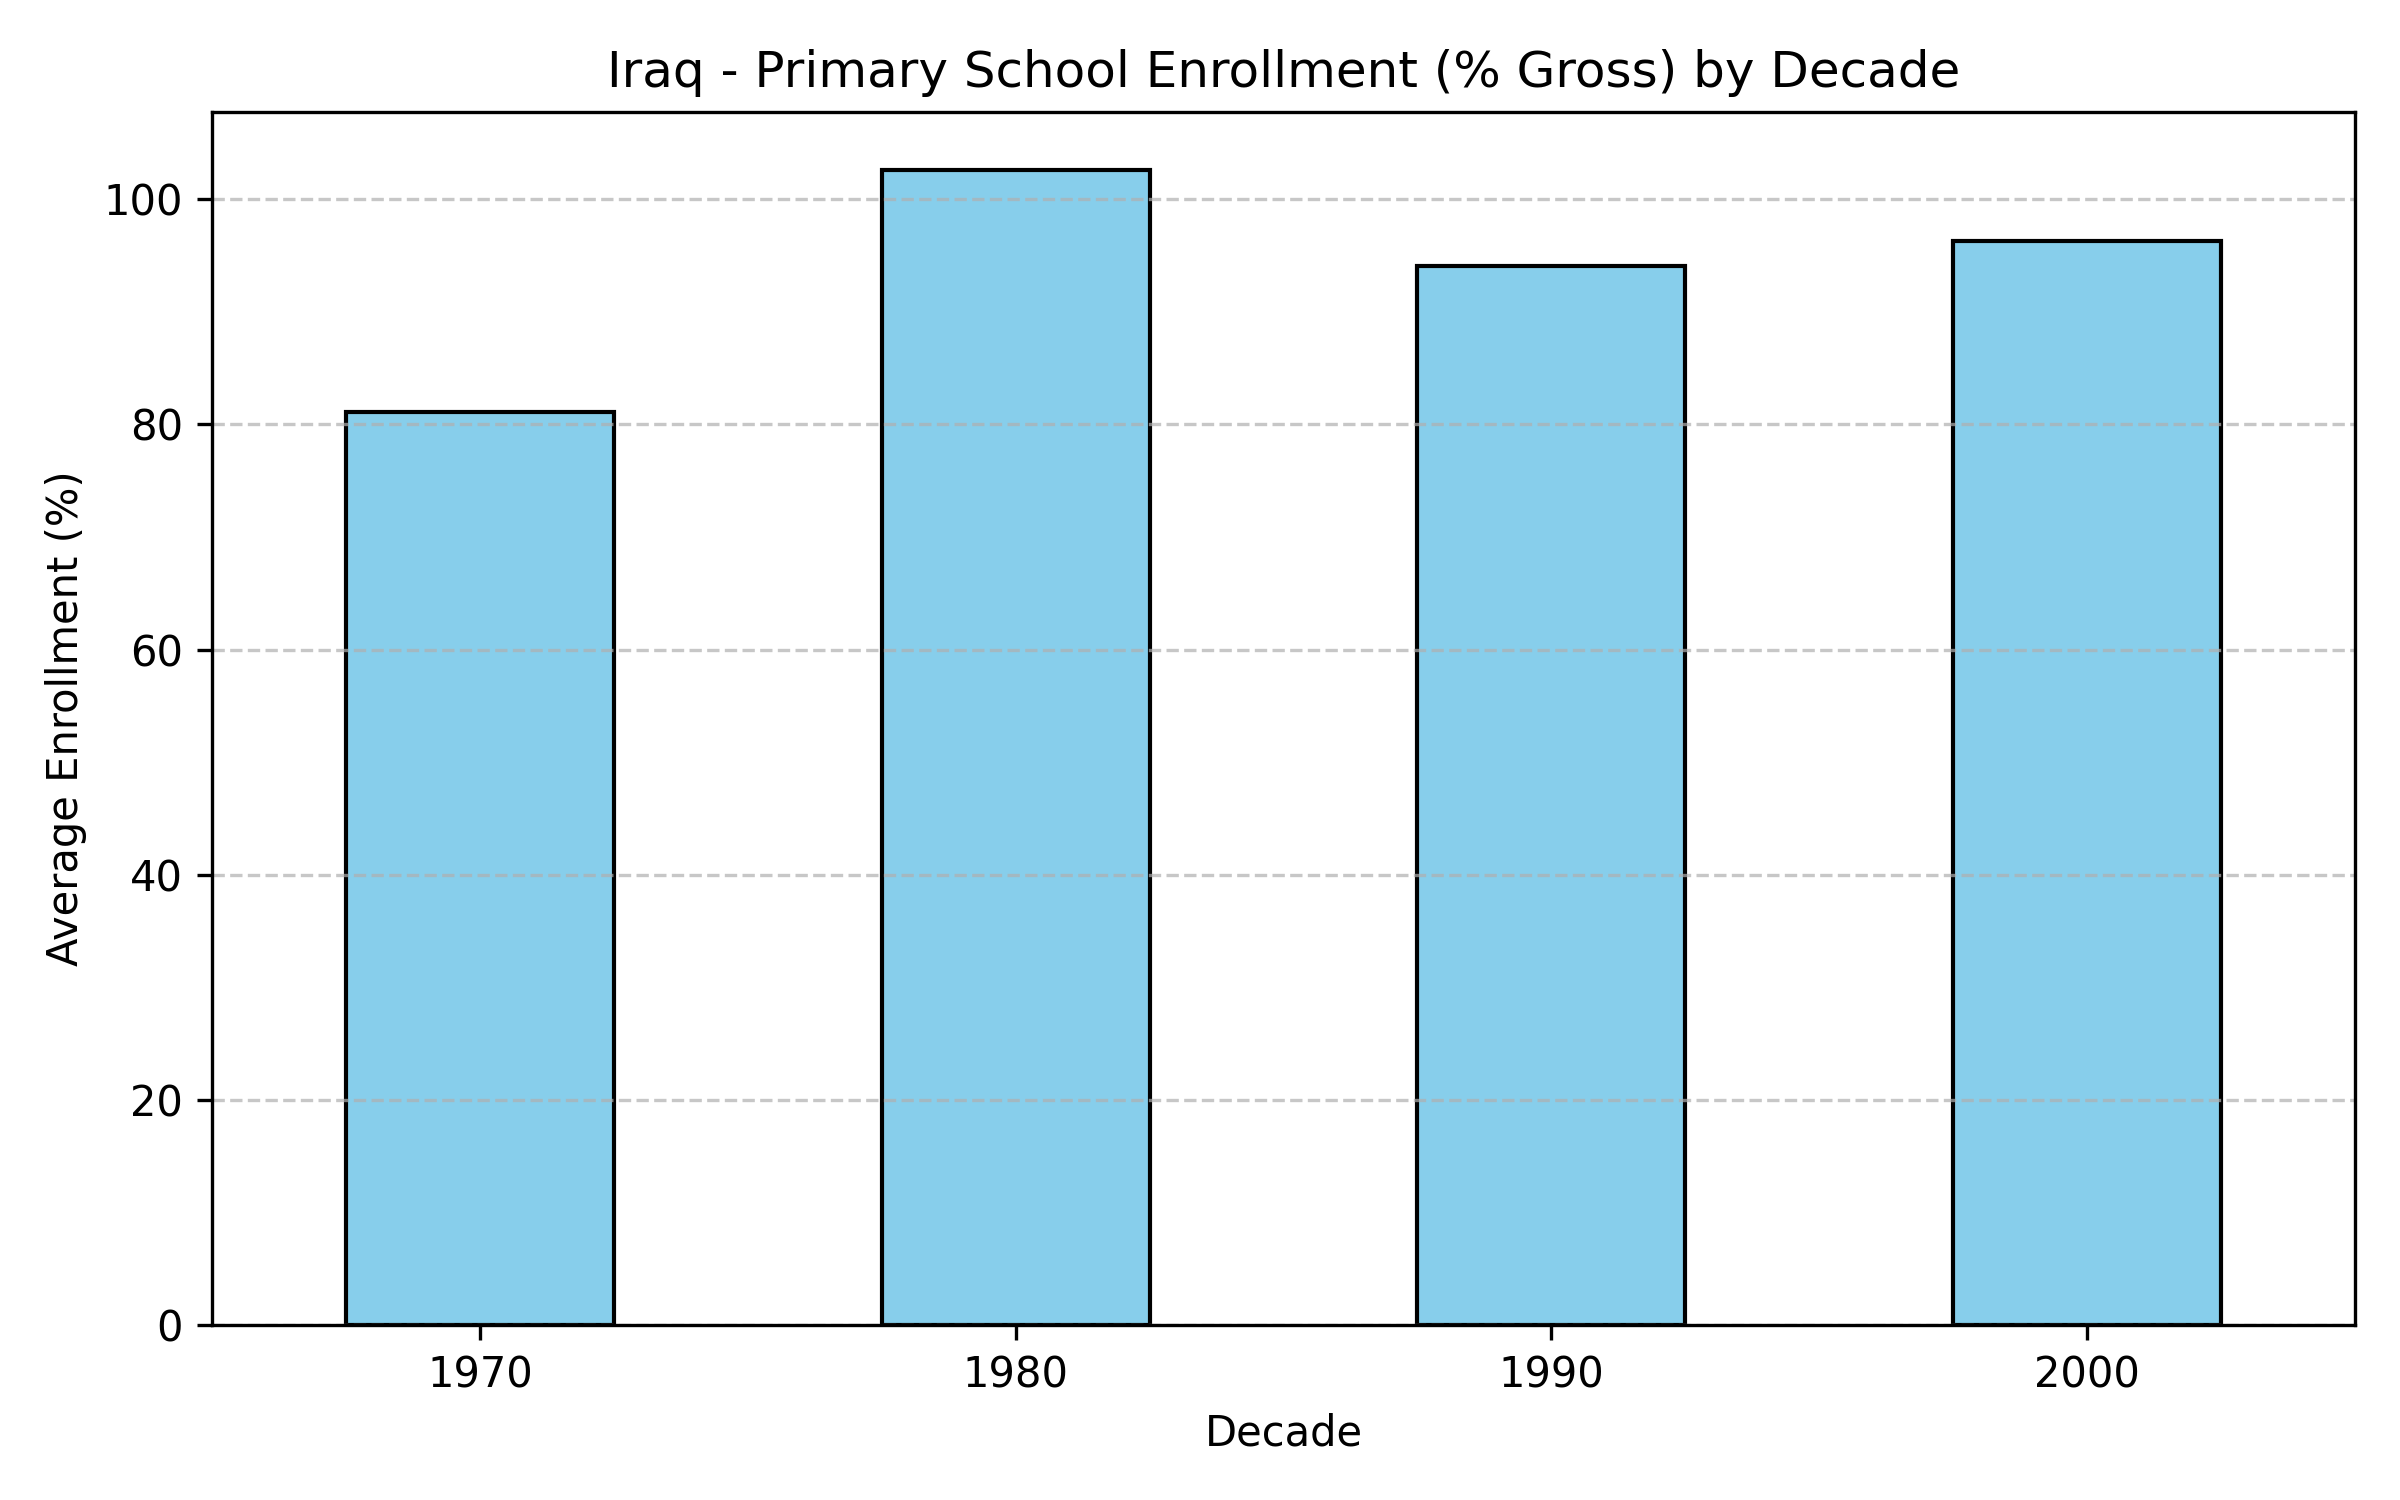

*Average enrollment by decade.*

---

### Year-over-Year Change

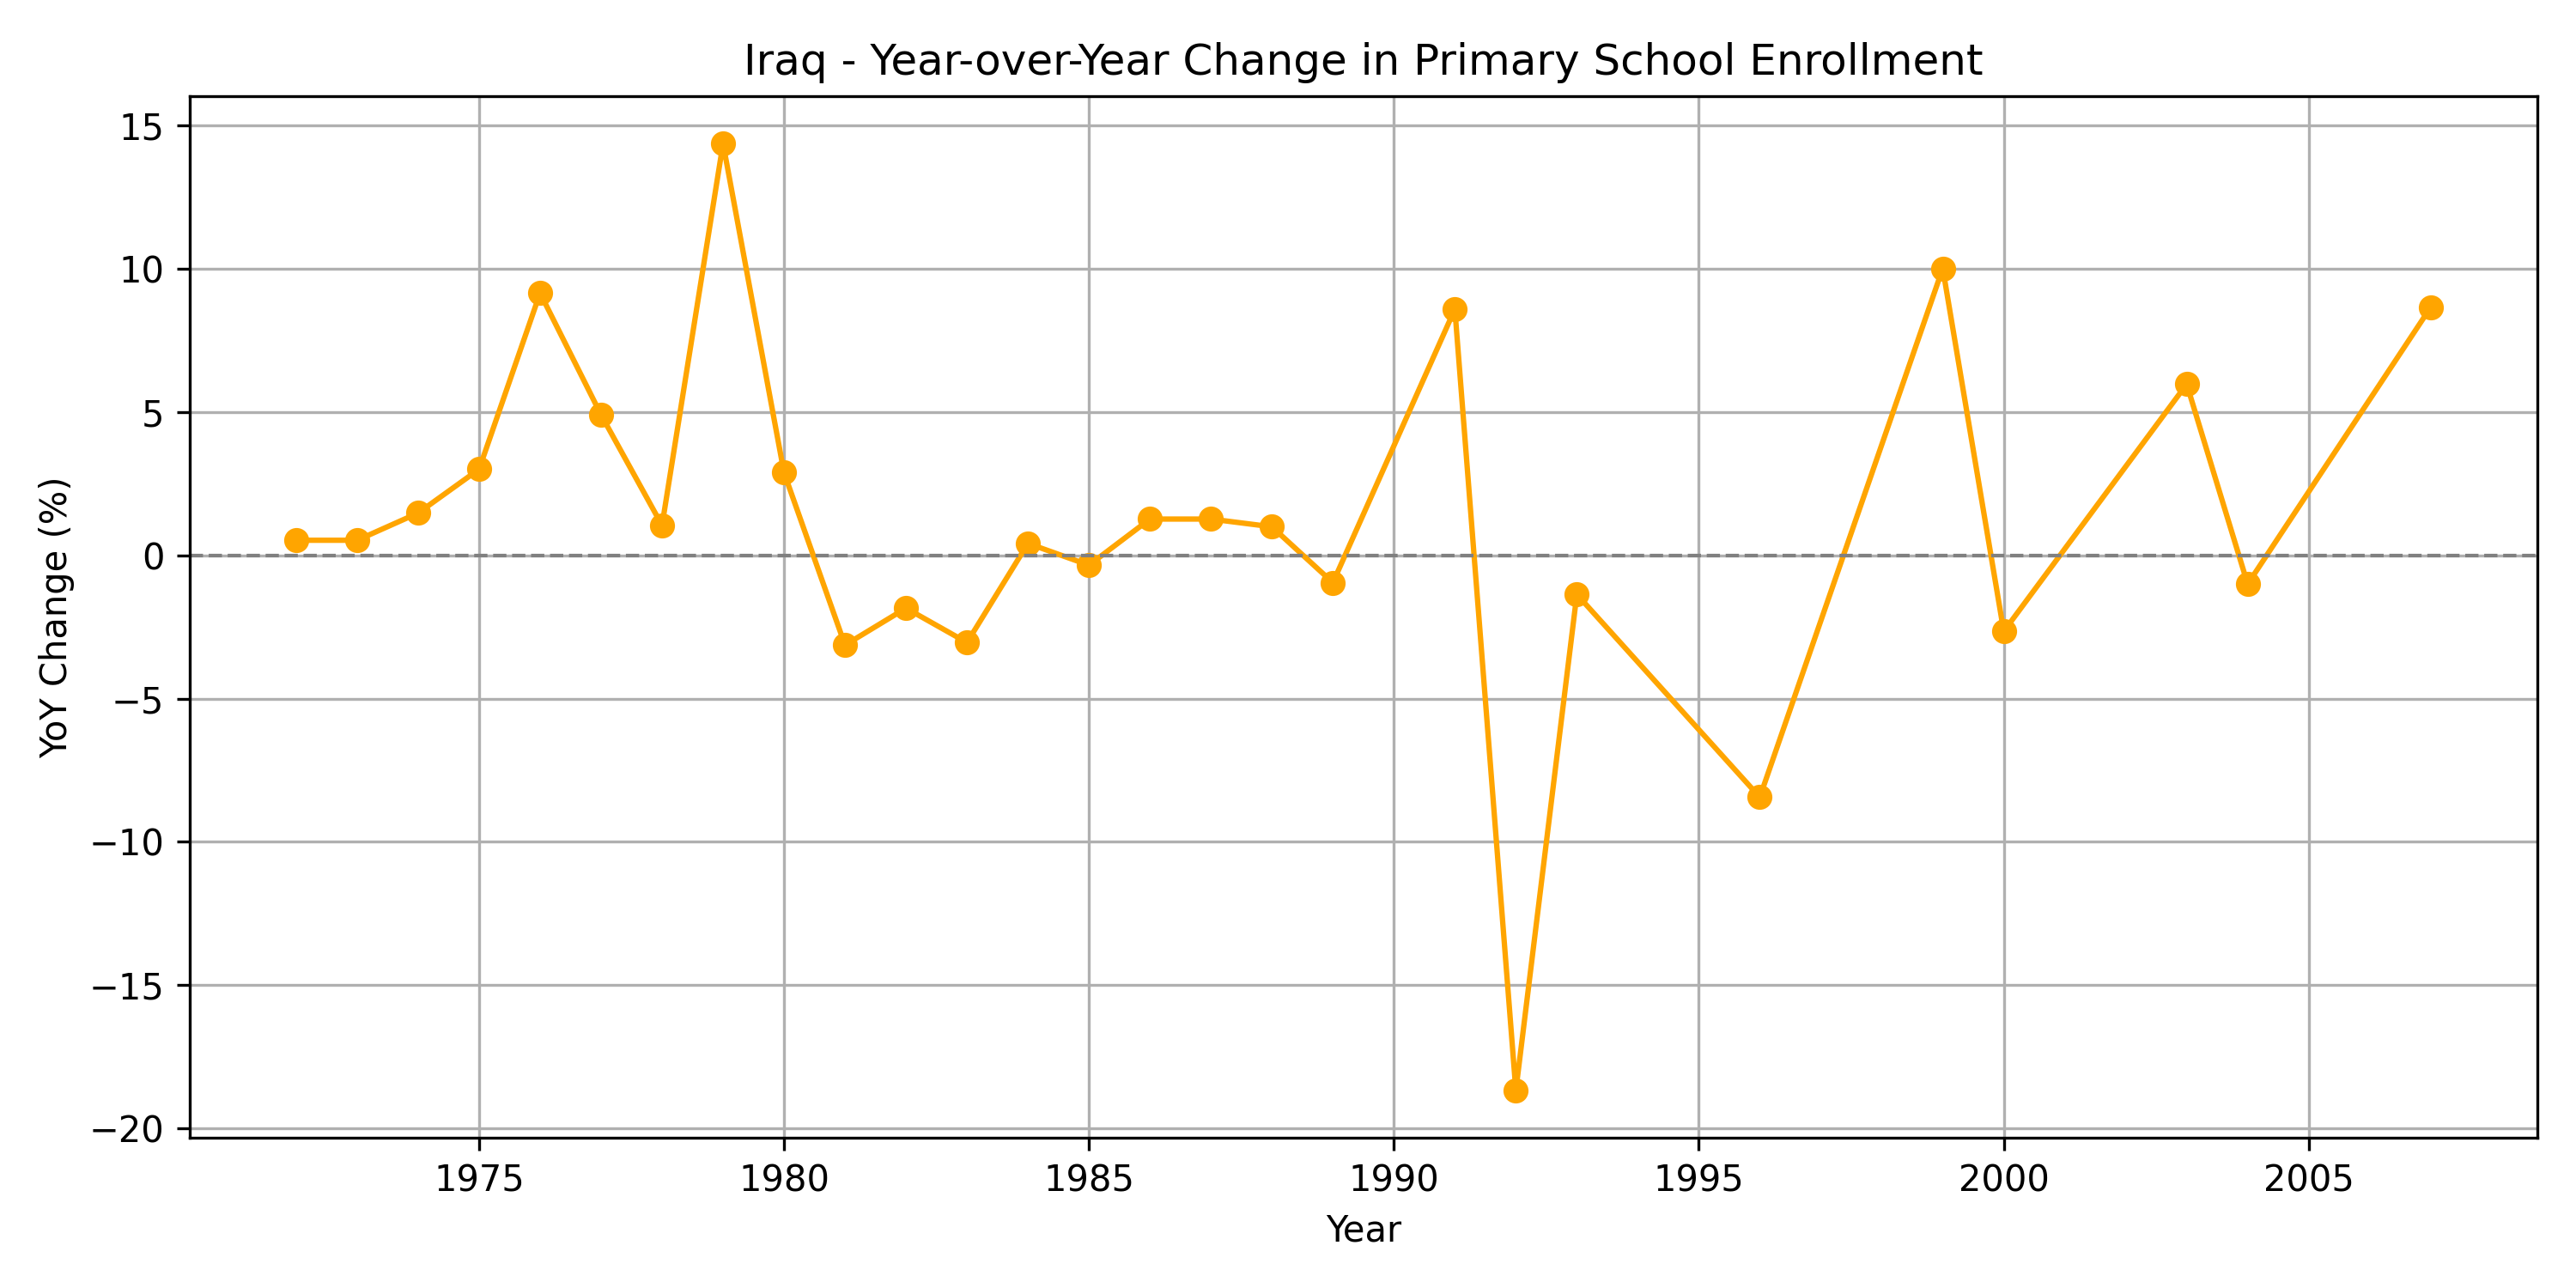

*Largest increase 1979; largest drop 1992.*

---

### Average (Card)

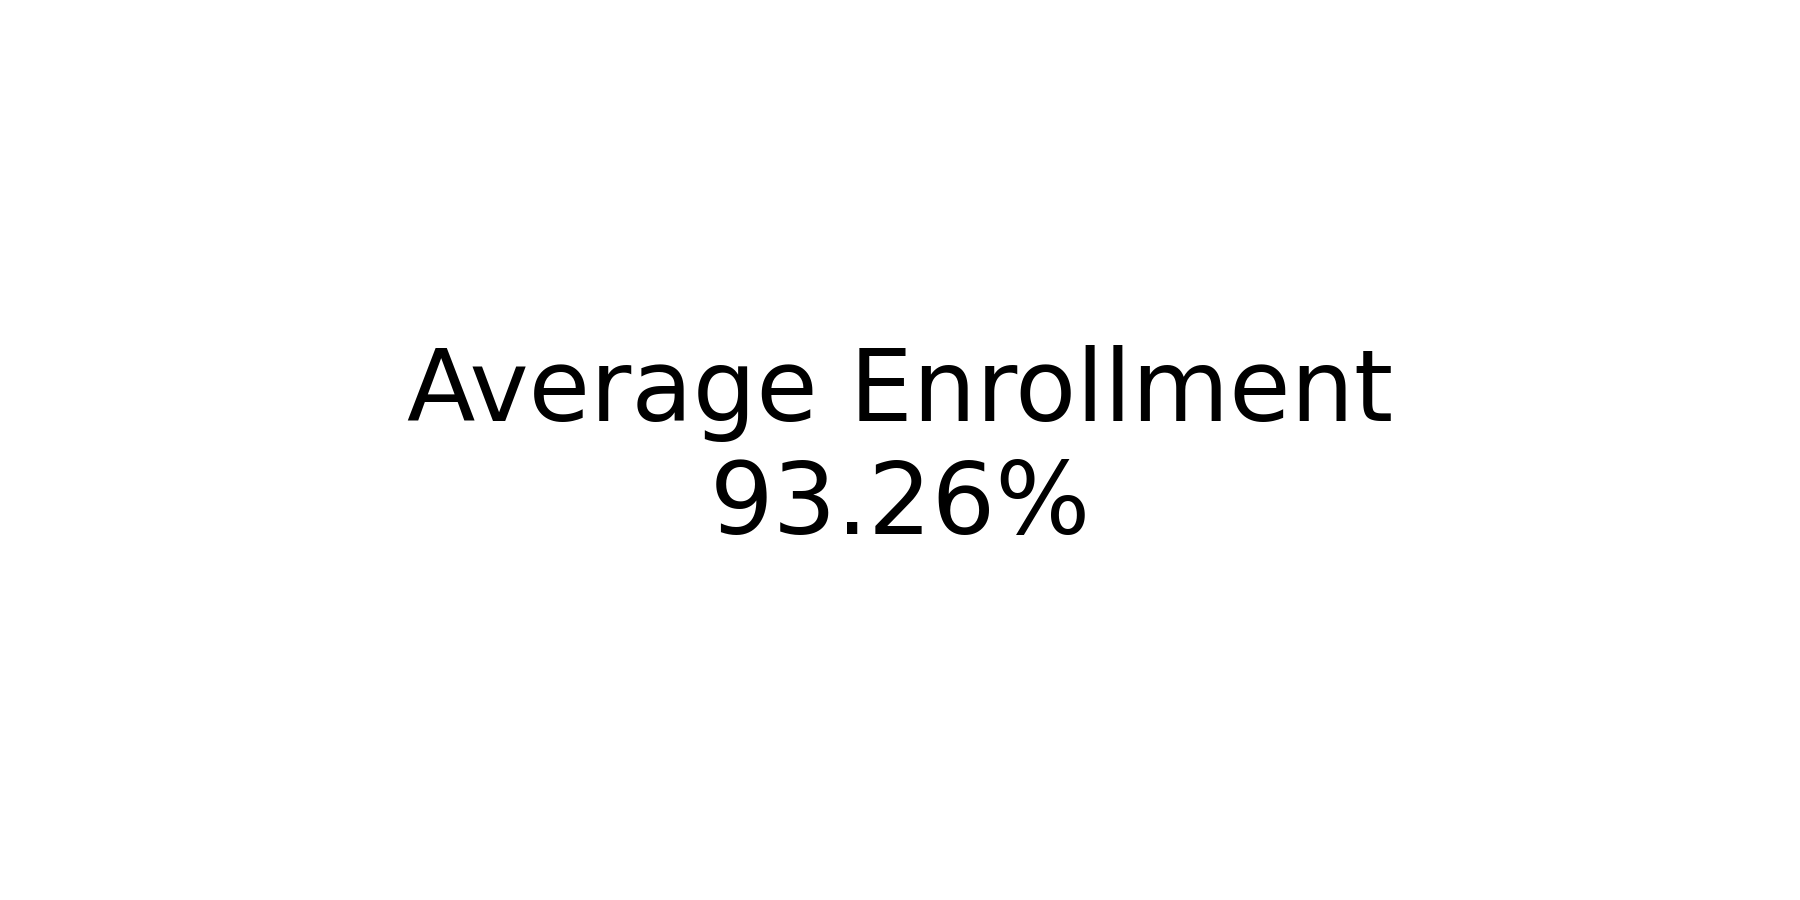

*Overall average = 93.26%.*

---

### Distribution (Mean vs Median)

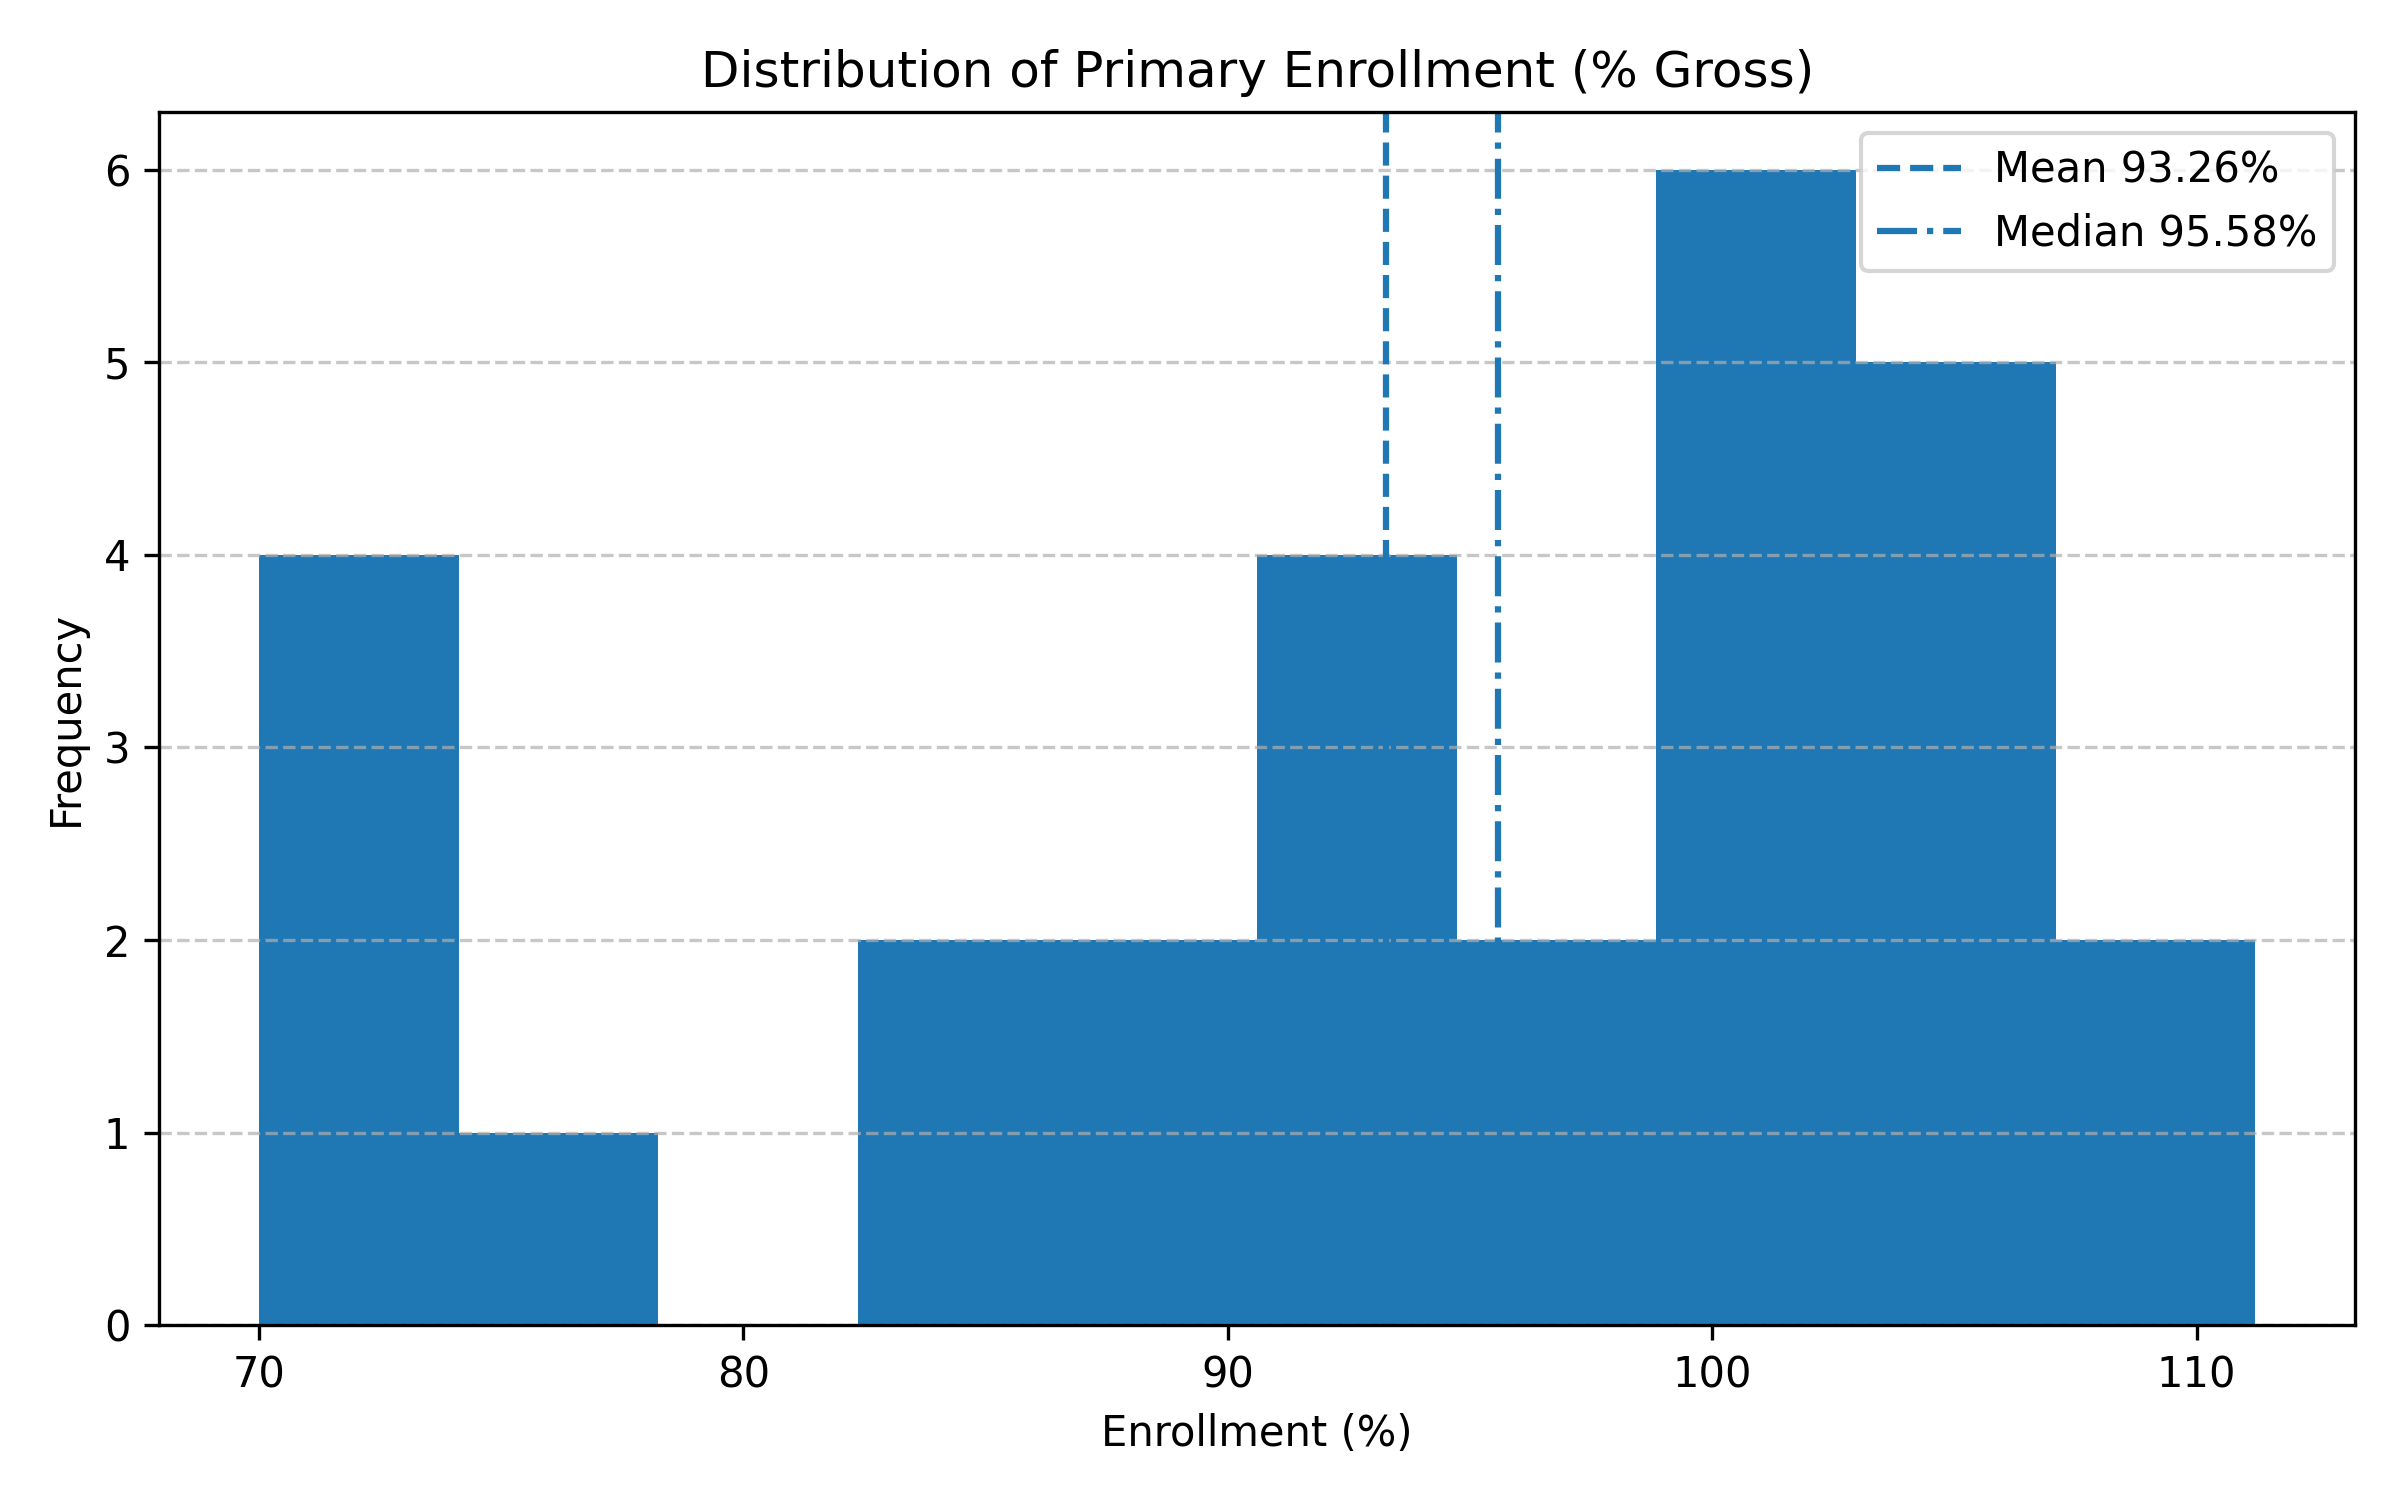

*Mean 93.26% vs median 95.58%.*

---

### Recovery 1992 → 1999

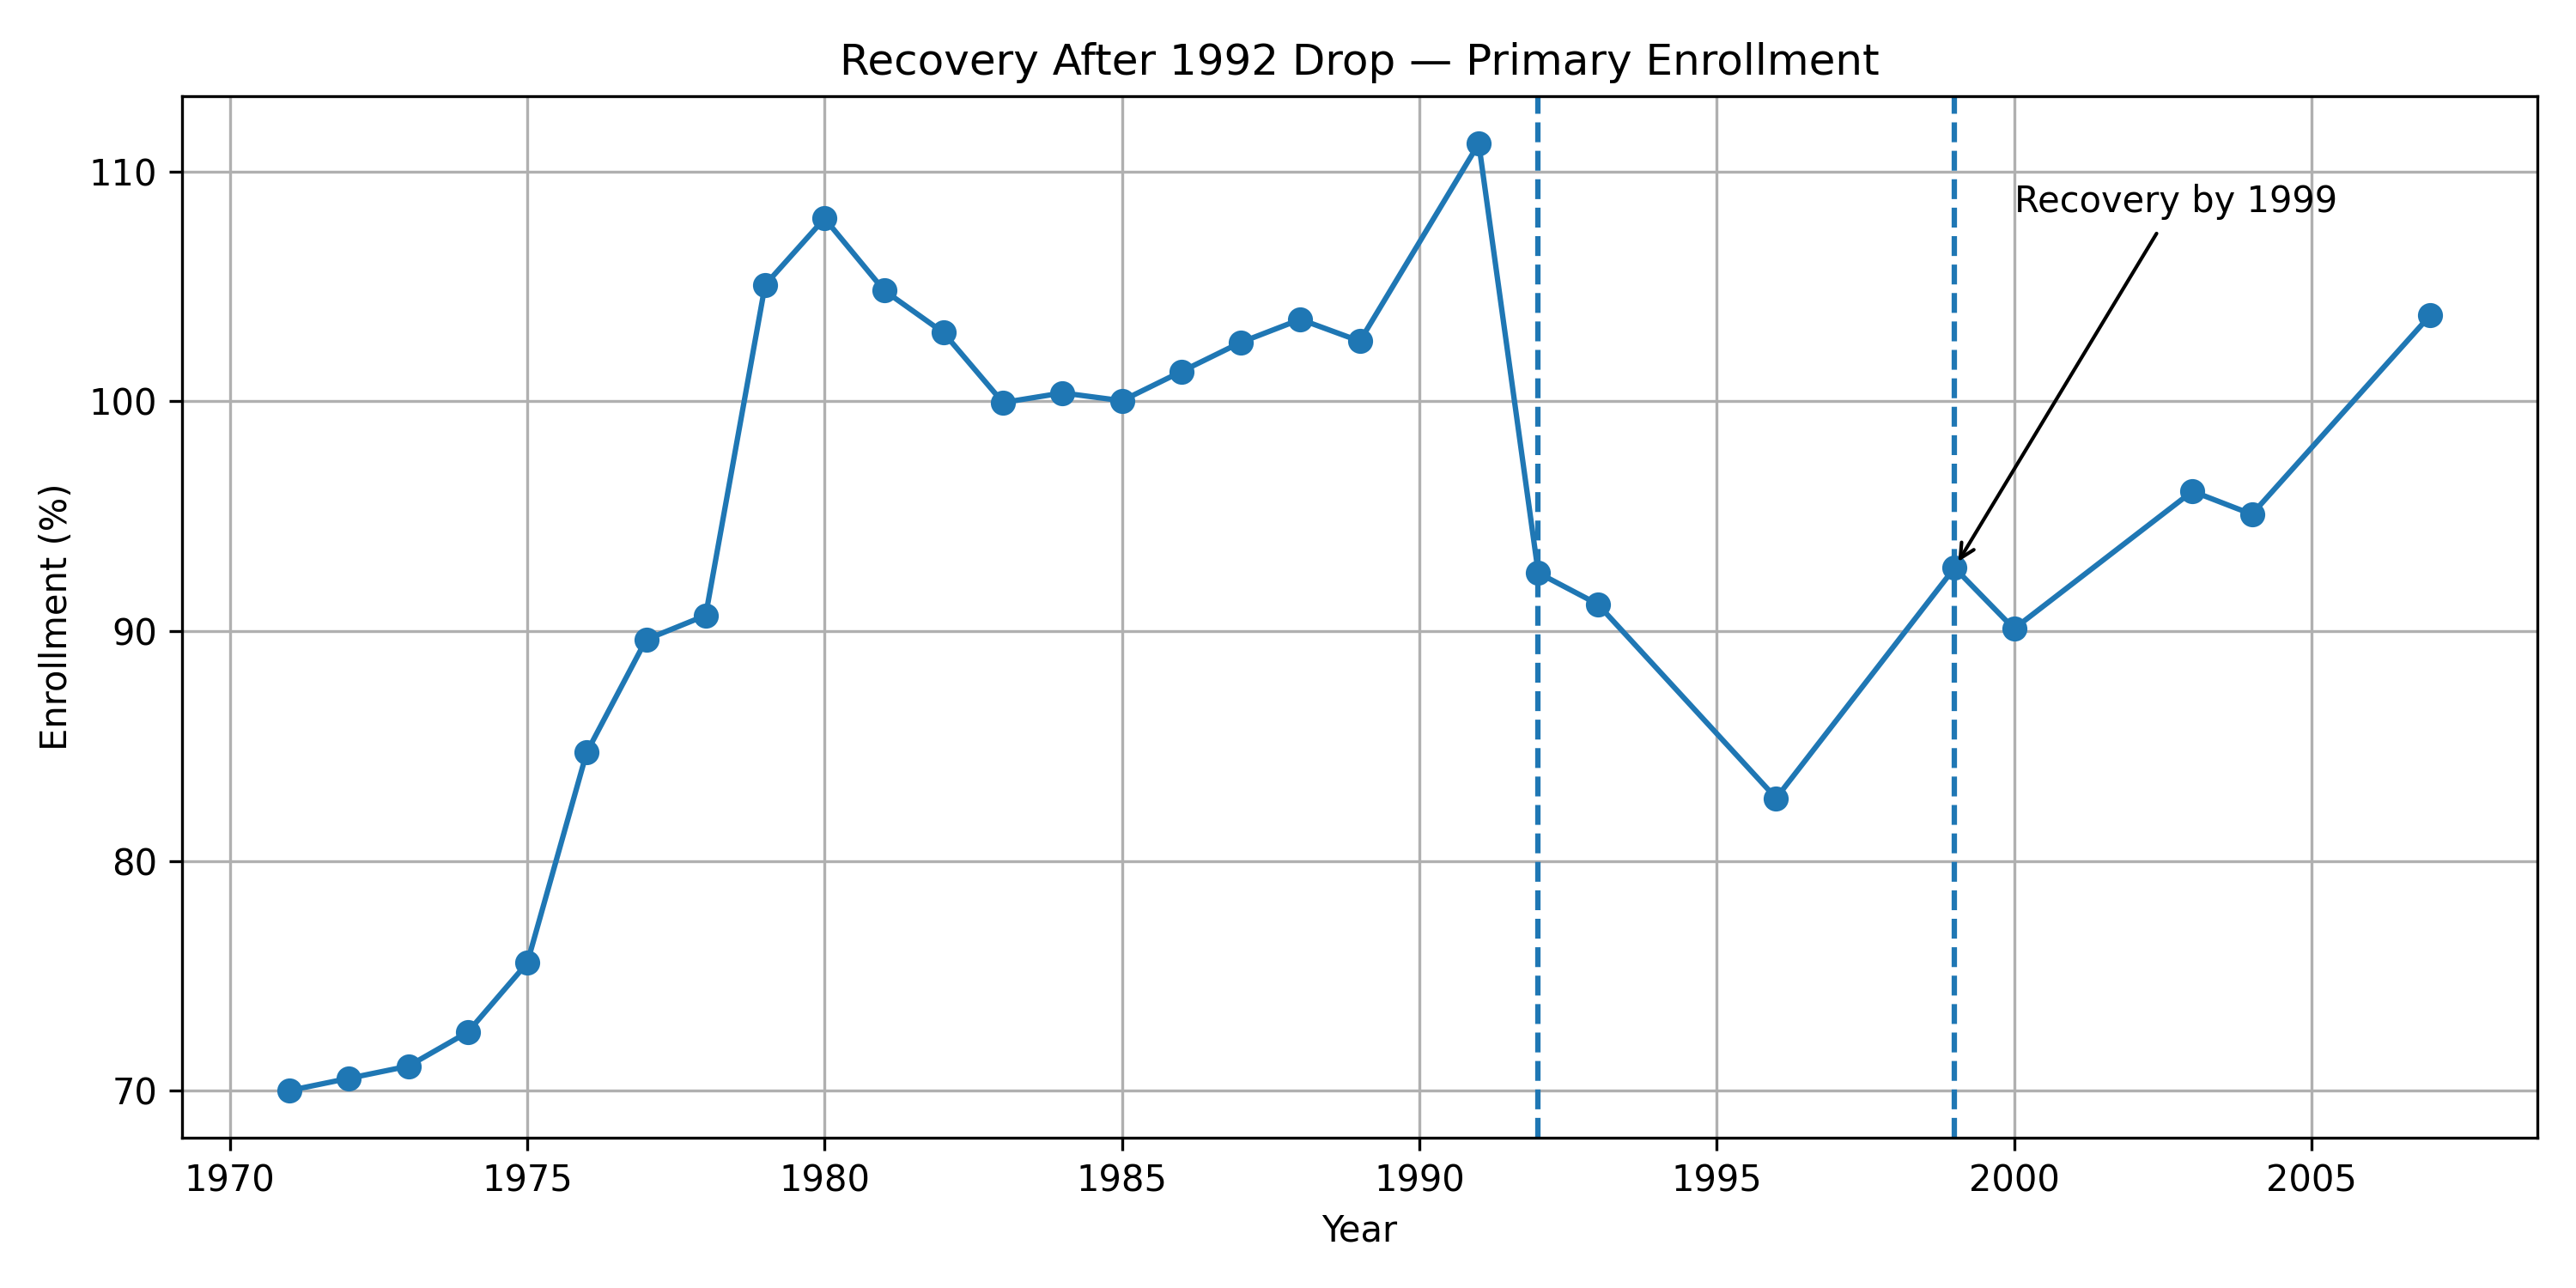

*Recovered to 1992 level by 1999.*

---

# 🔎 Bonus Insights Gallery

### Before vs After 1990

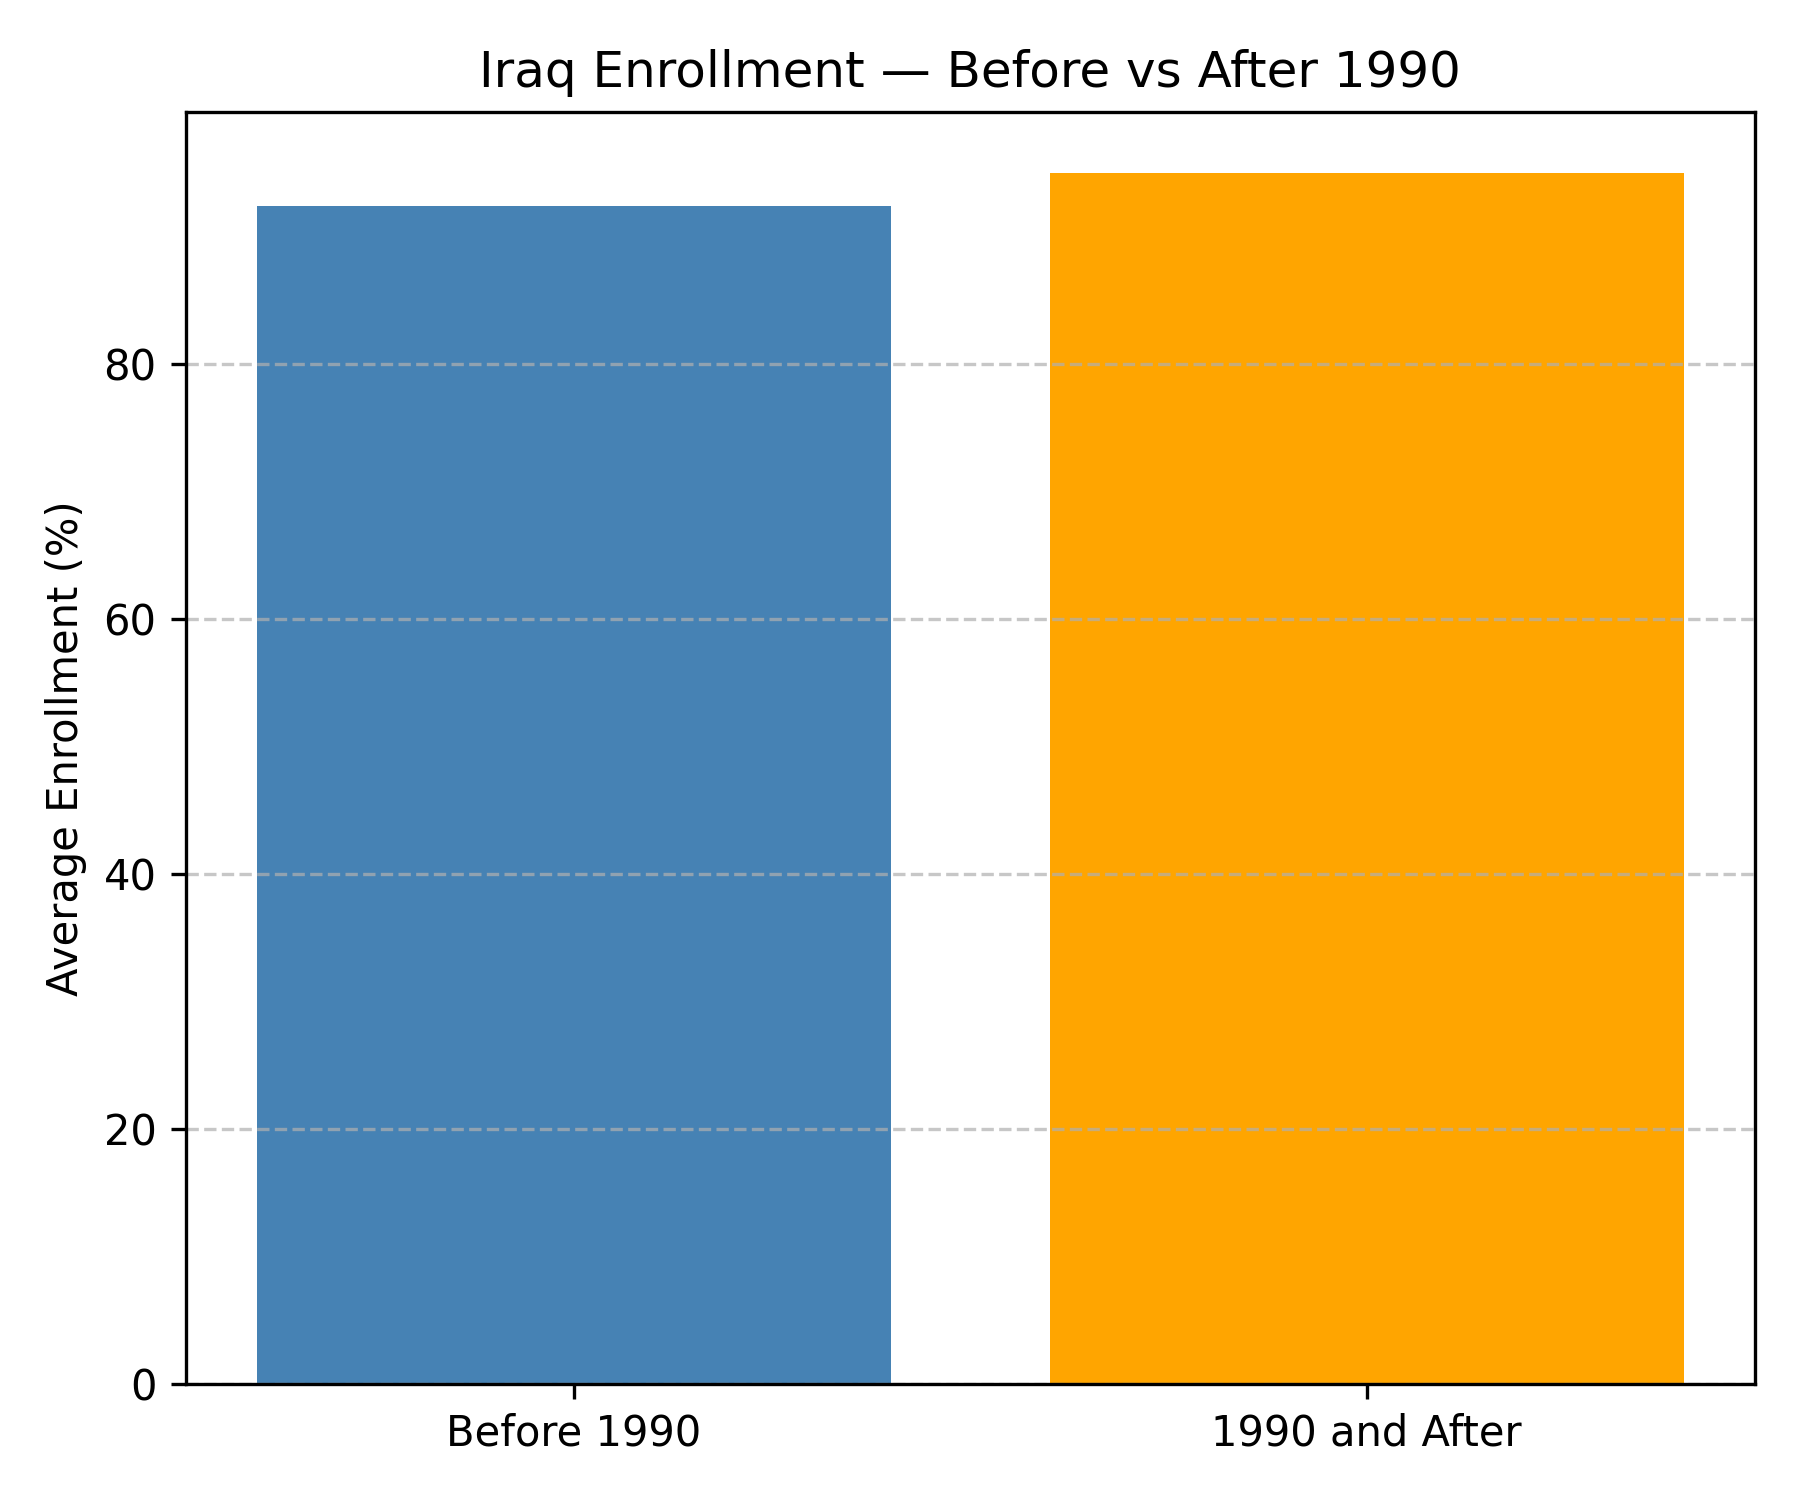

*Pre-1990 = 92.42%, Post-1990 = 95.04%.*

---

### CAGR to Peak (1971→1991)

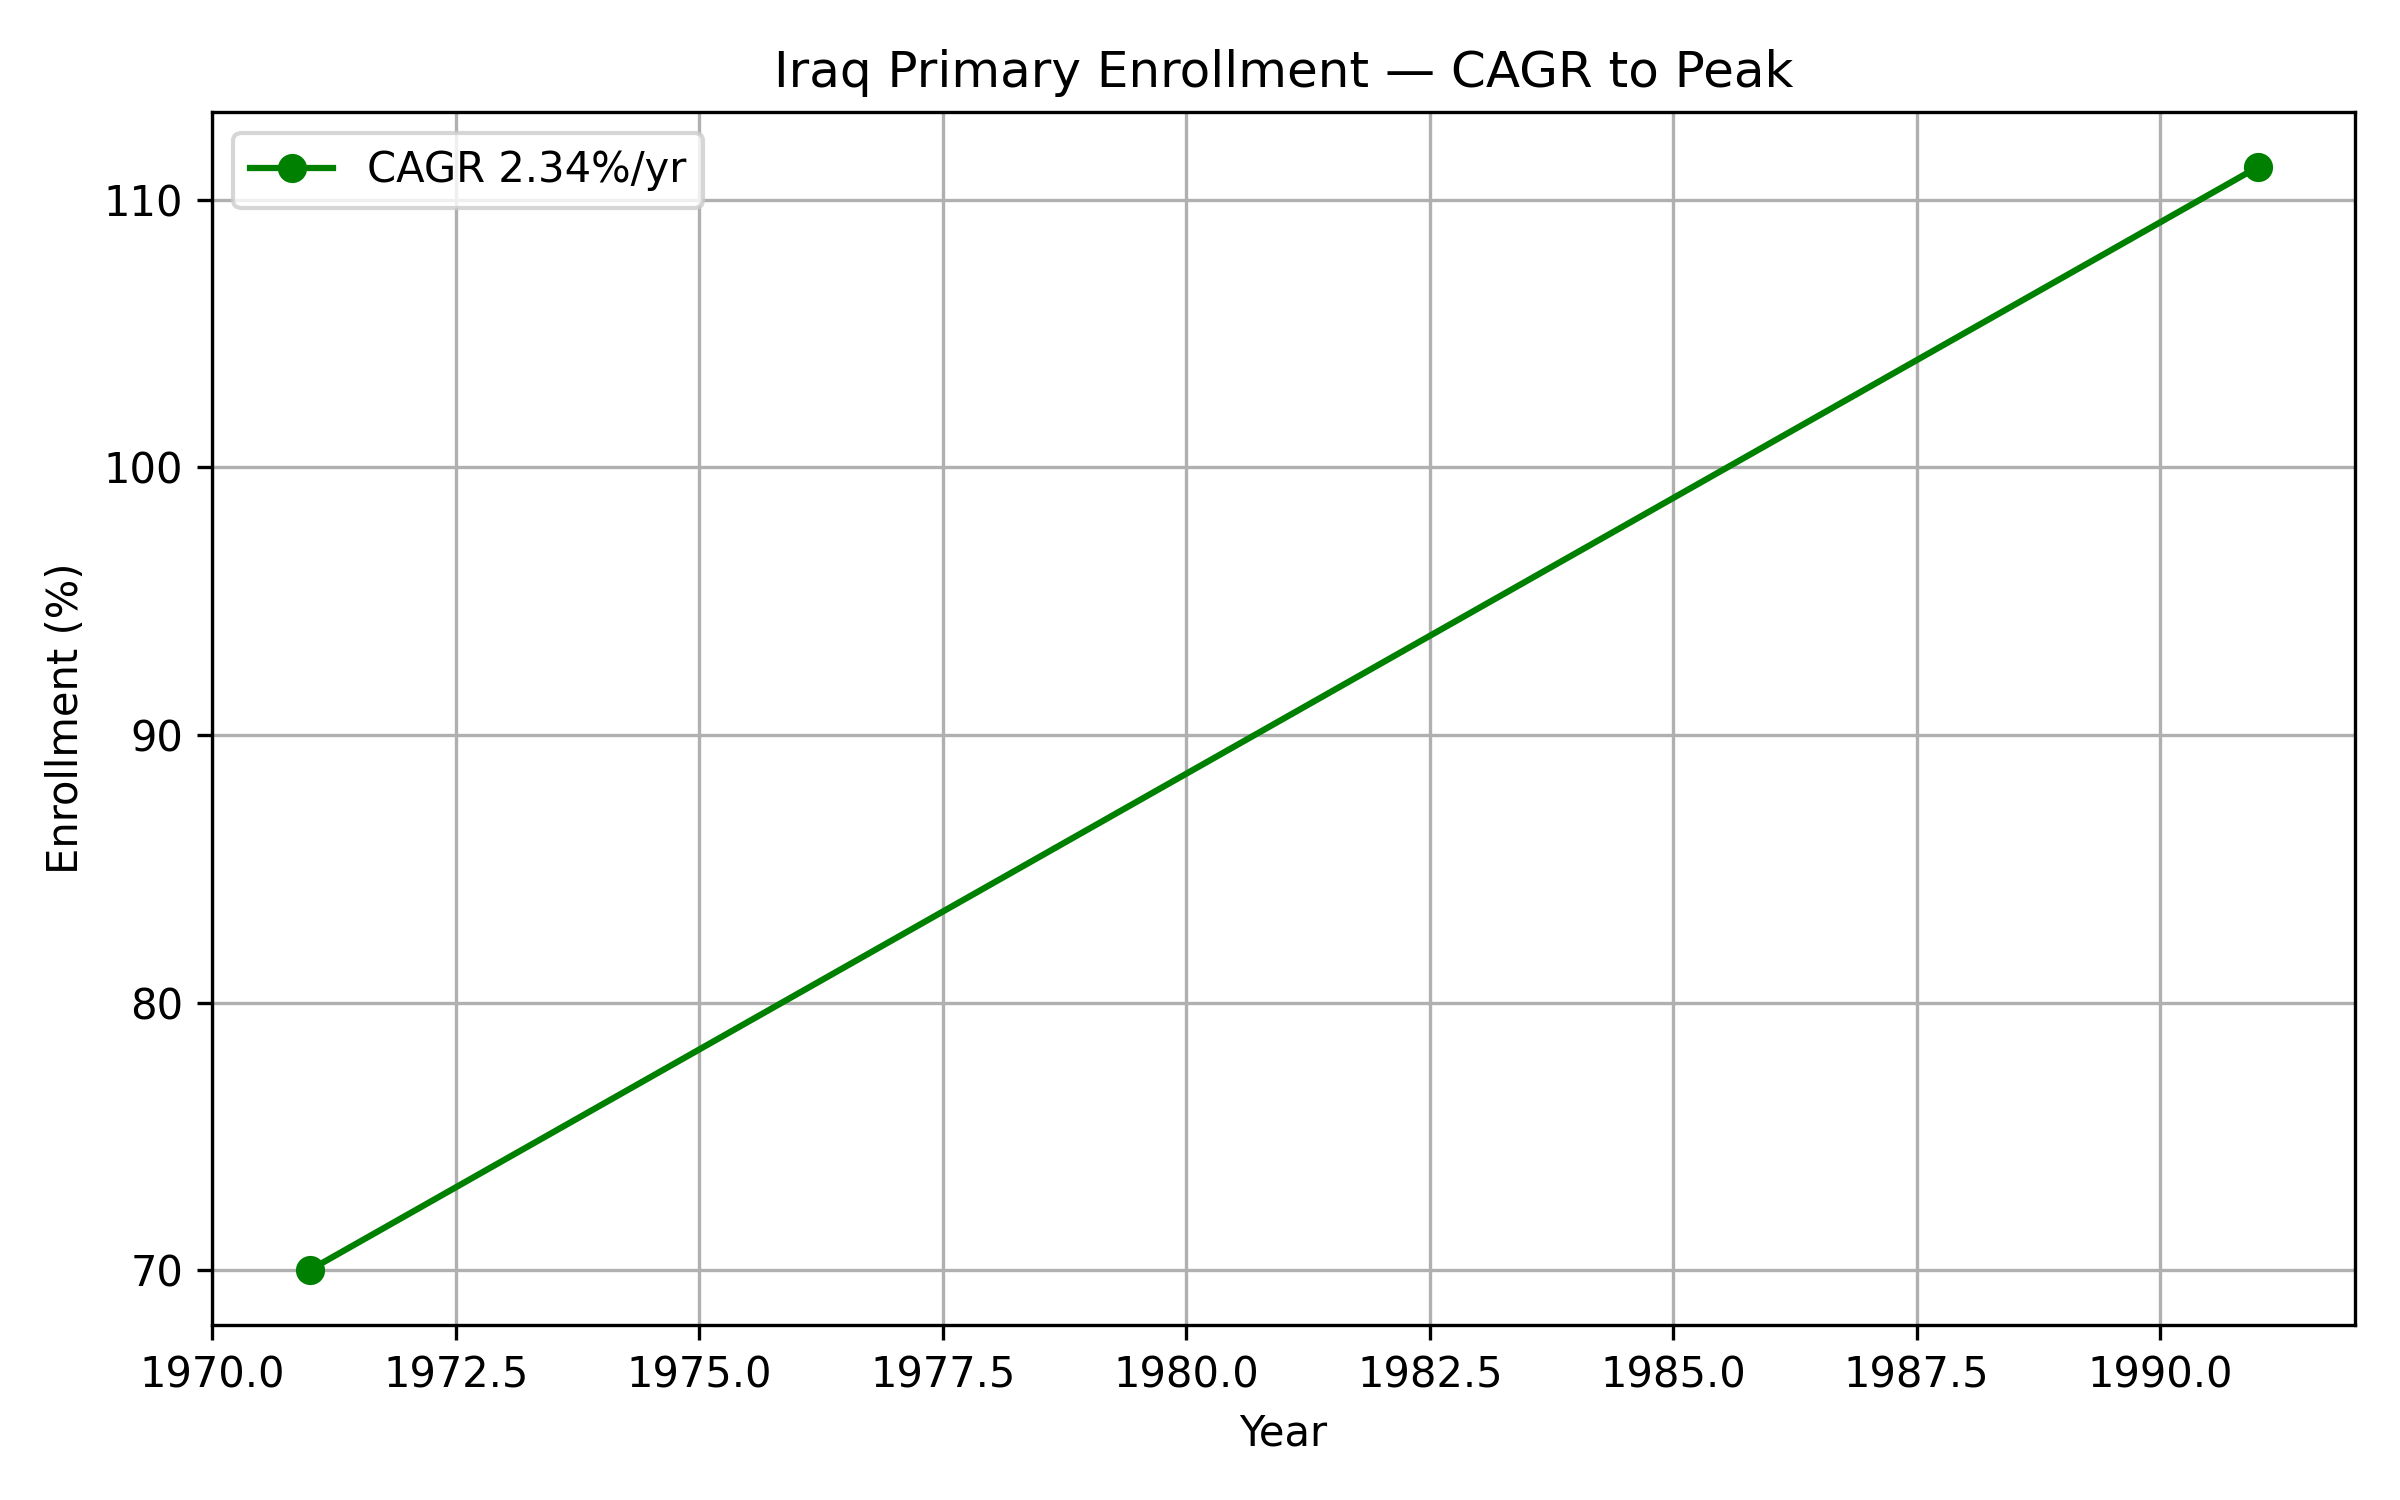

*CAGR ≈ 2.34% per year to peak.*

---

### Decade Volatility

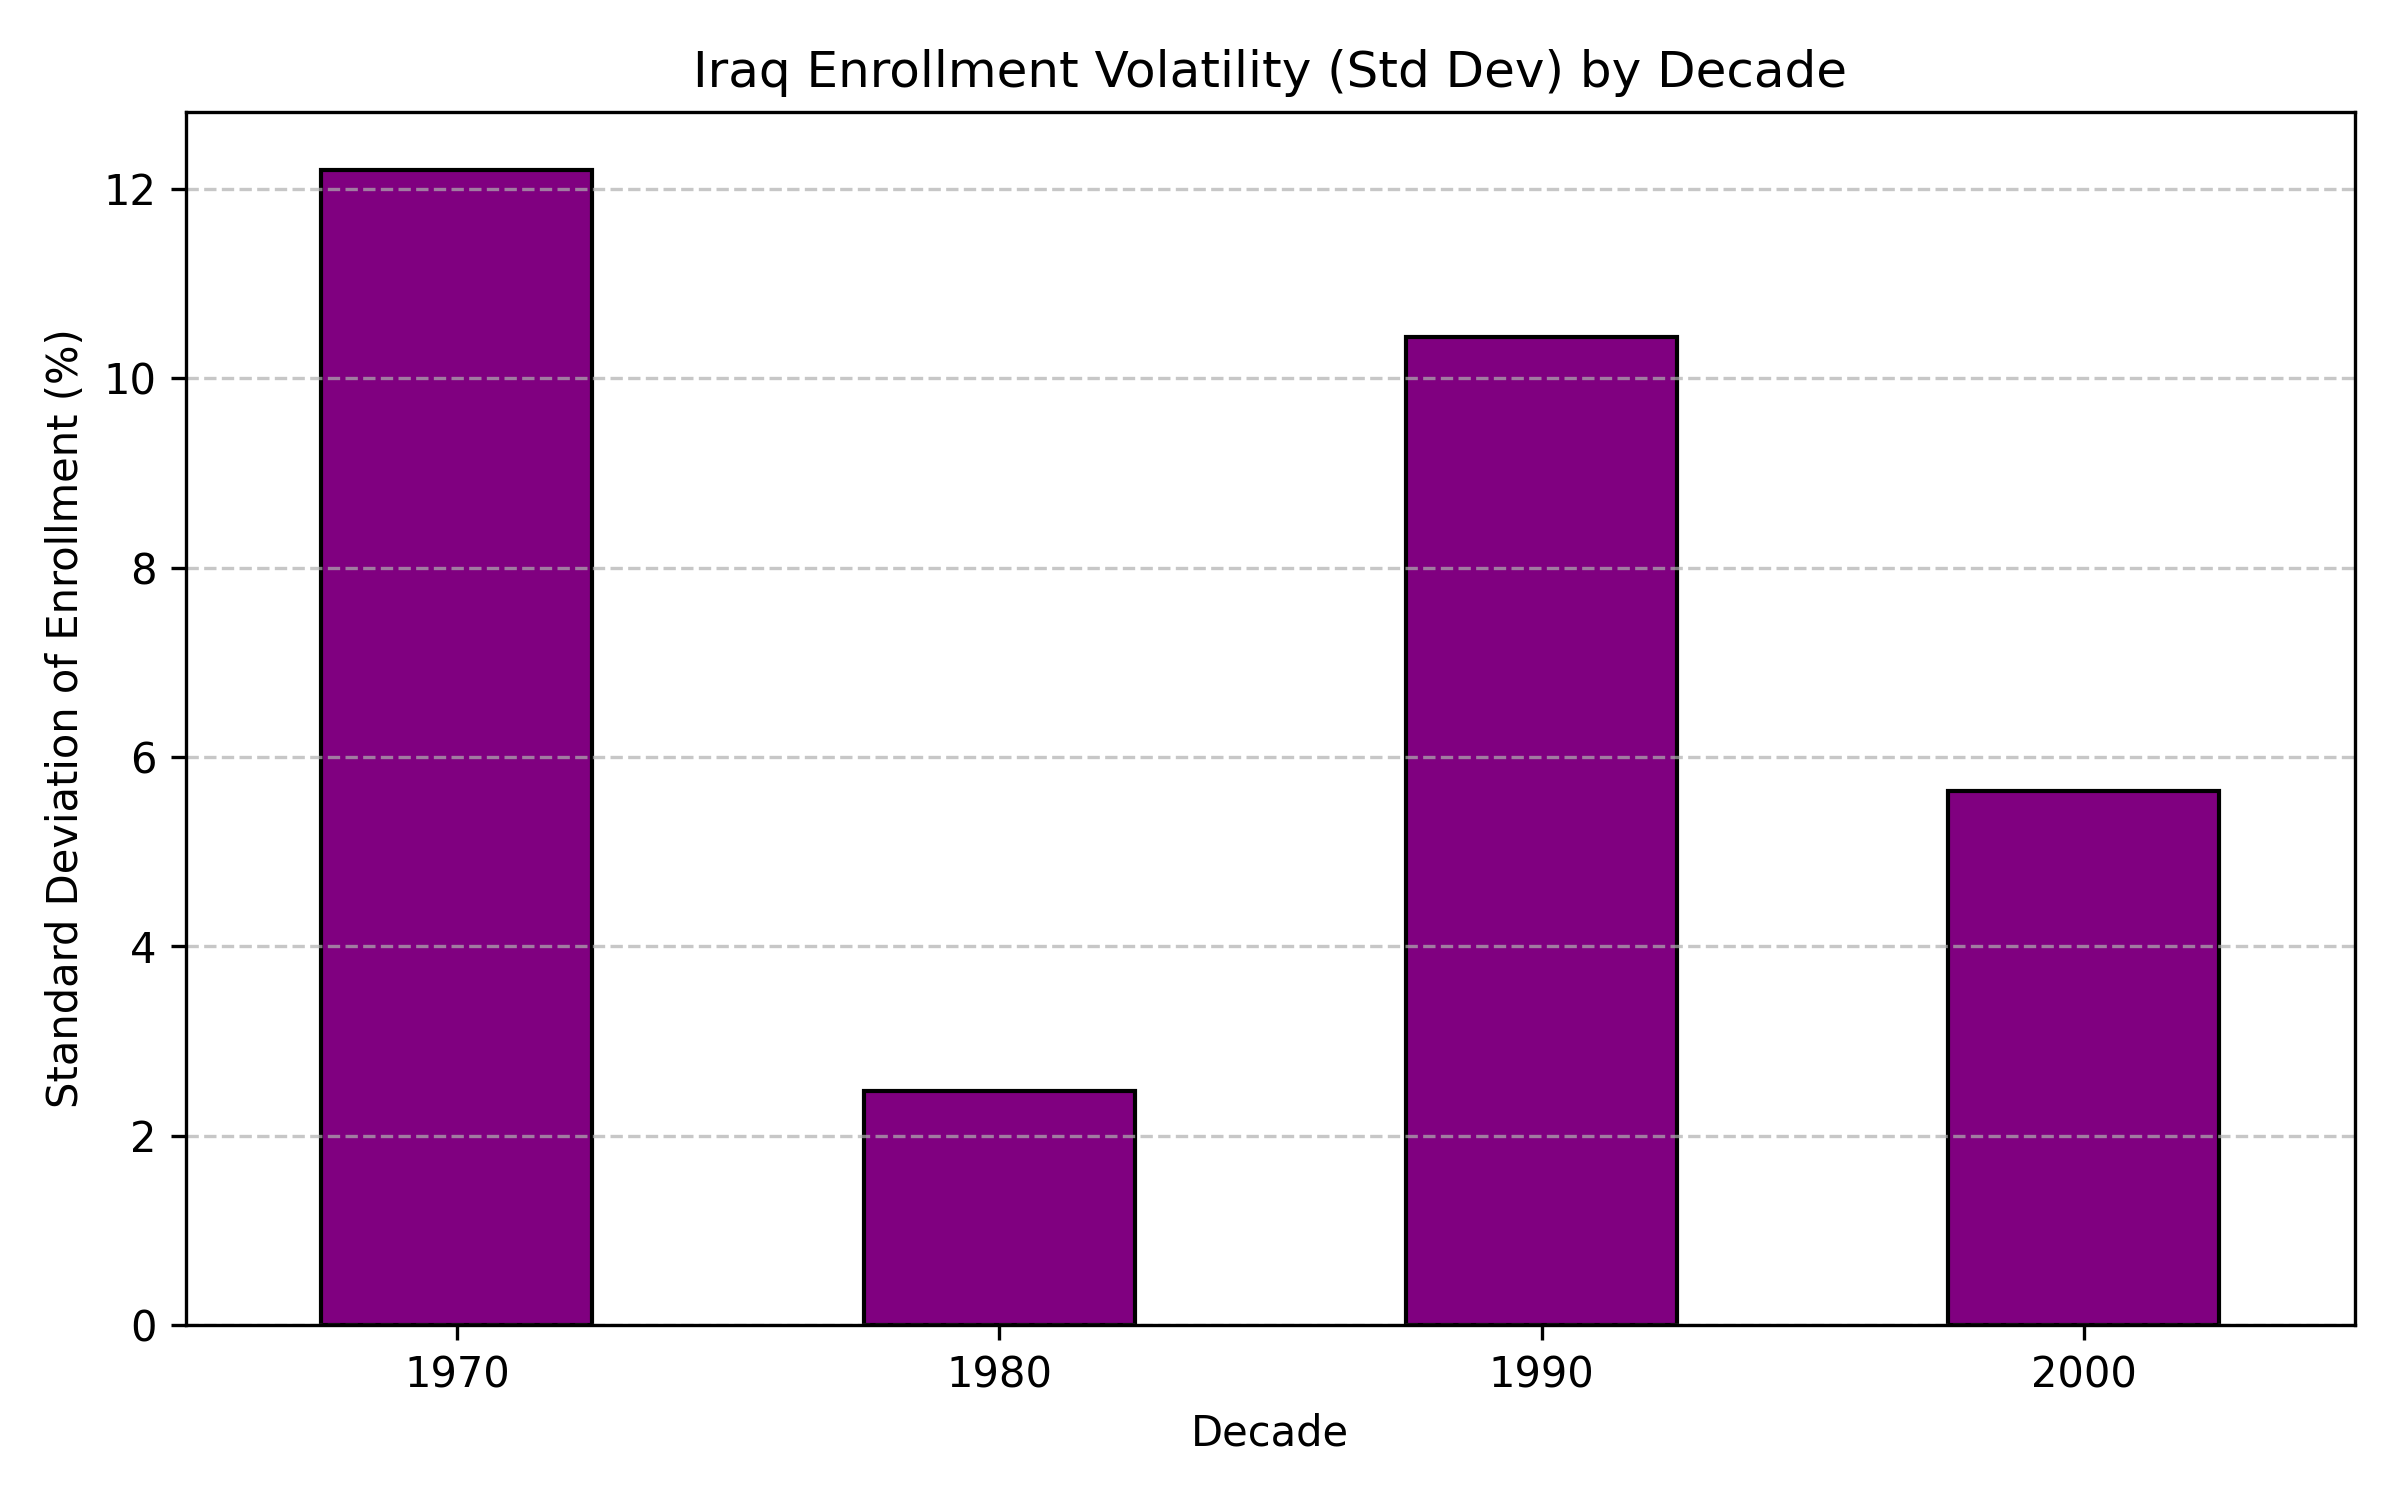

*Most volatile: 1970s; least: 1980s.*

---

### 1991→1992 Peak-to-Drop

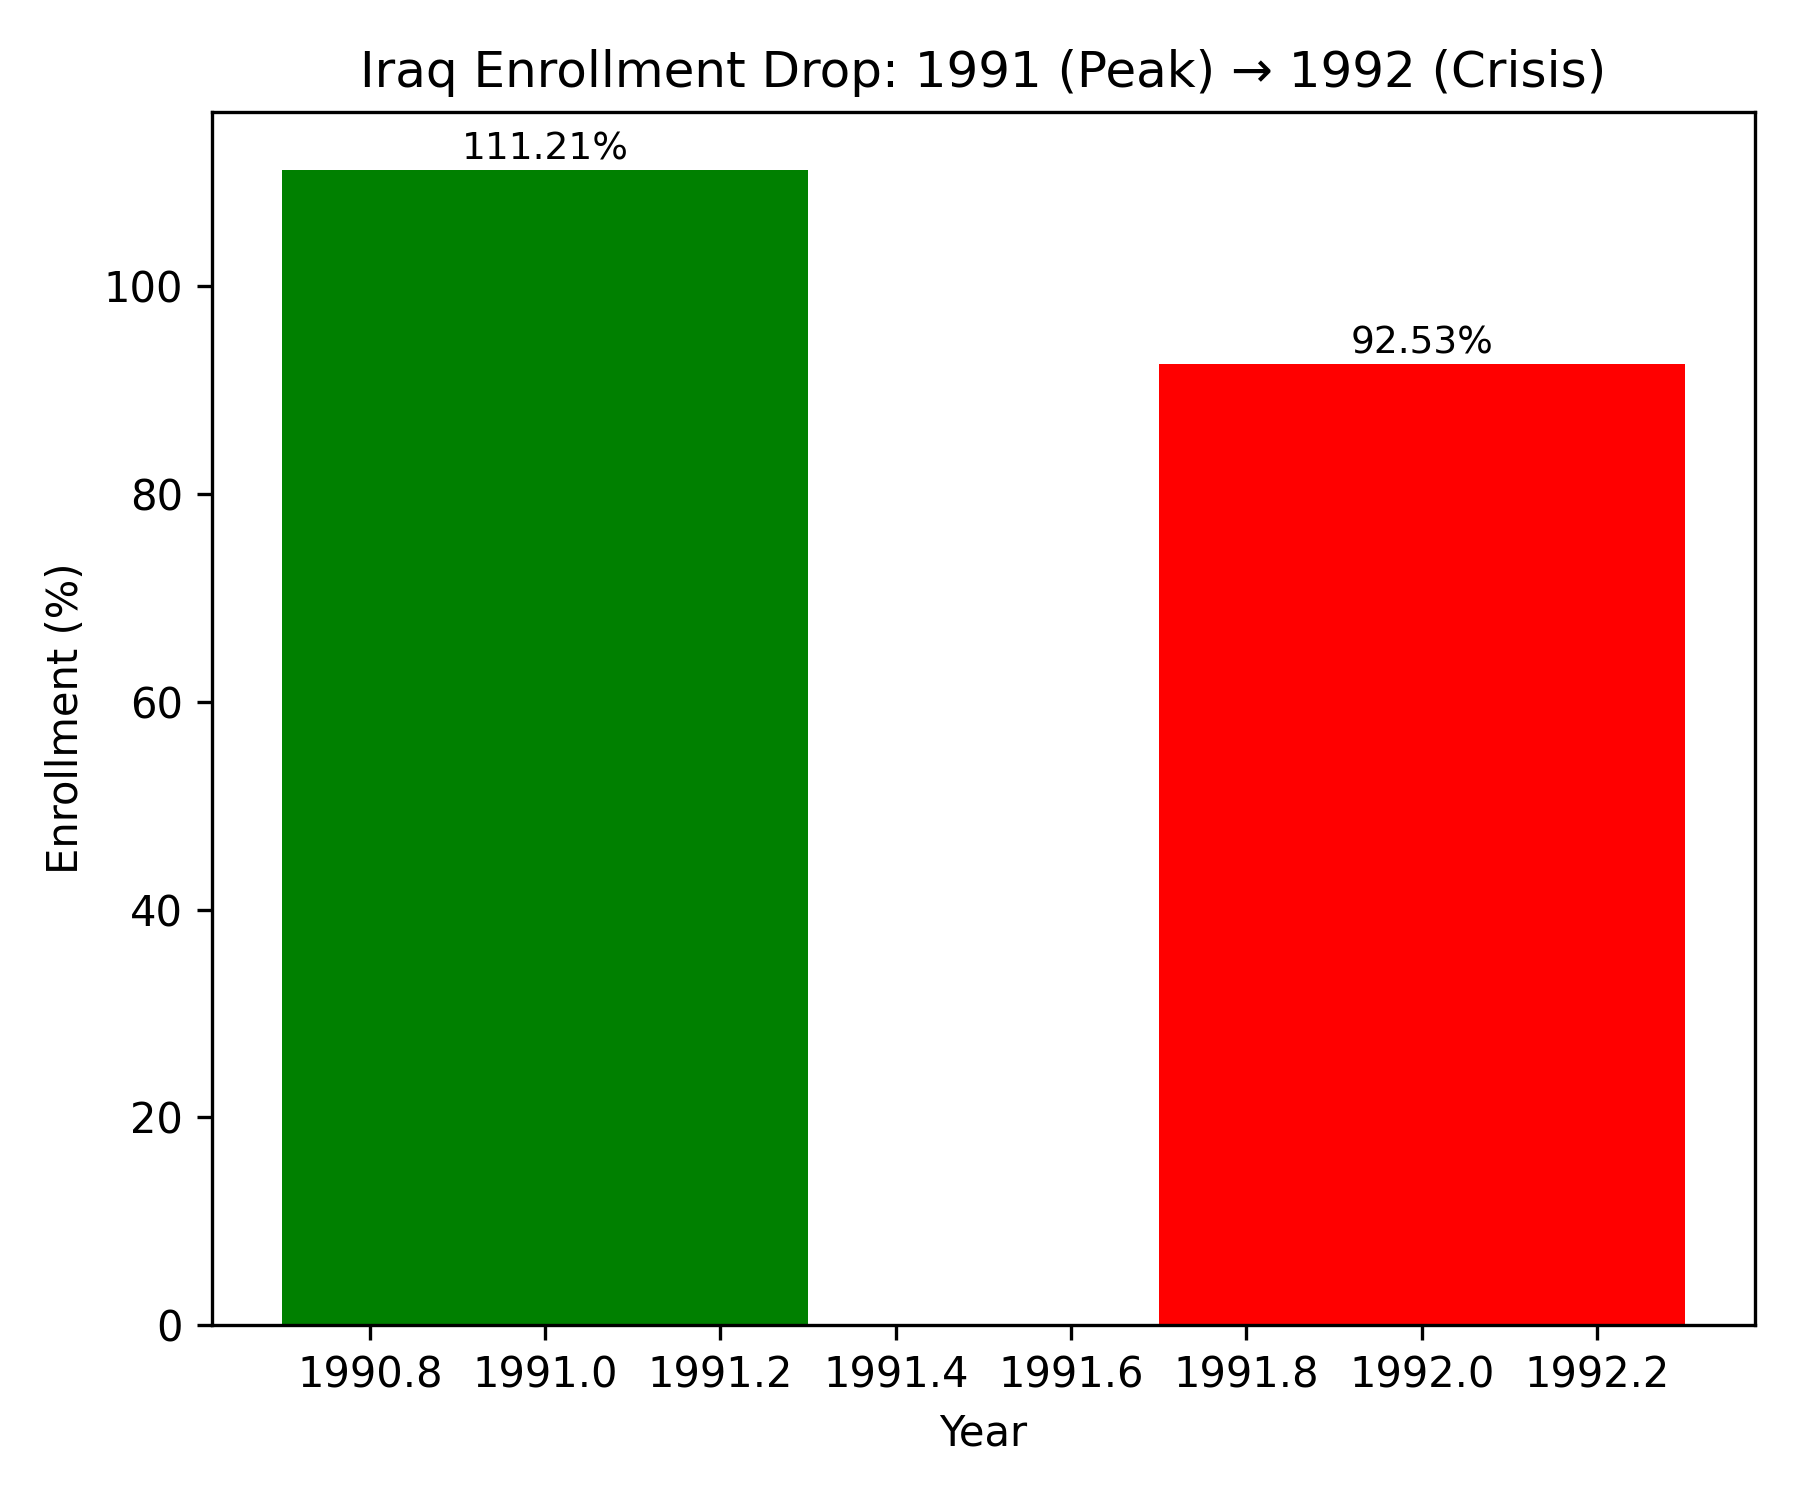

*Drop = 18.68 points (–16.8%).*

---

### Resilience Index (Recovery Speed)

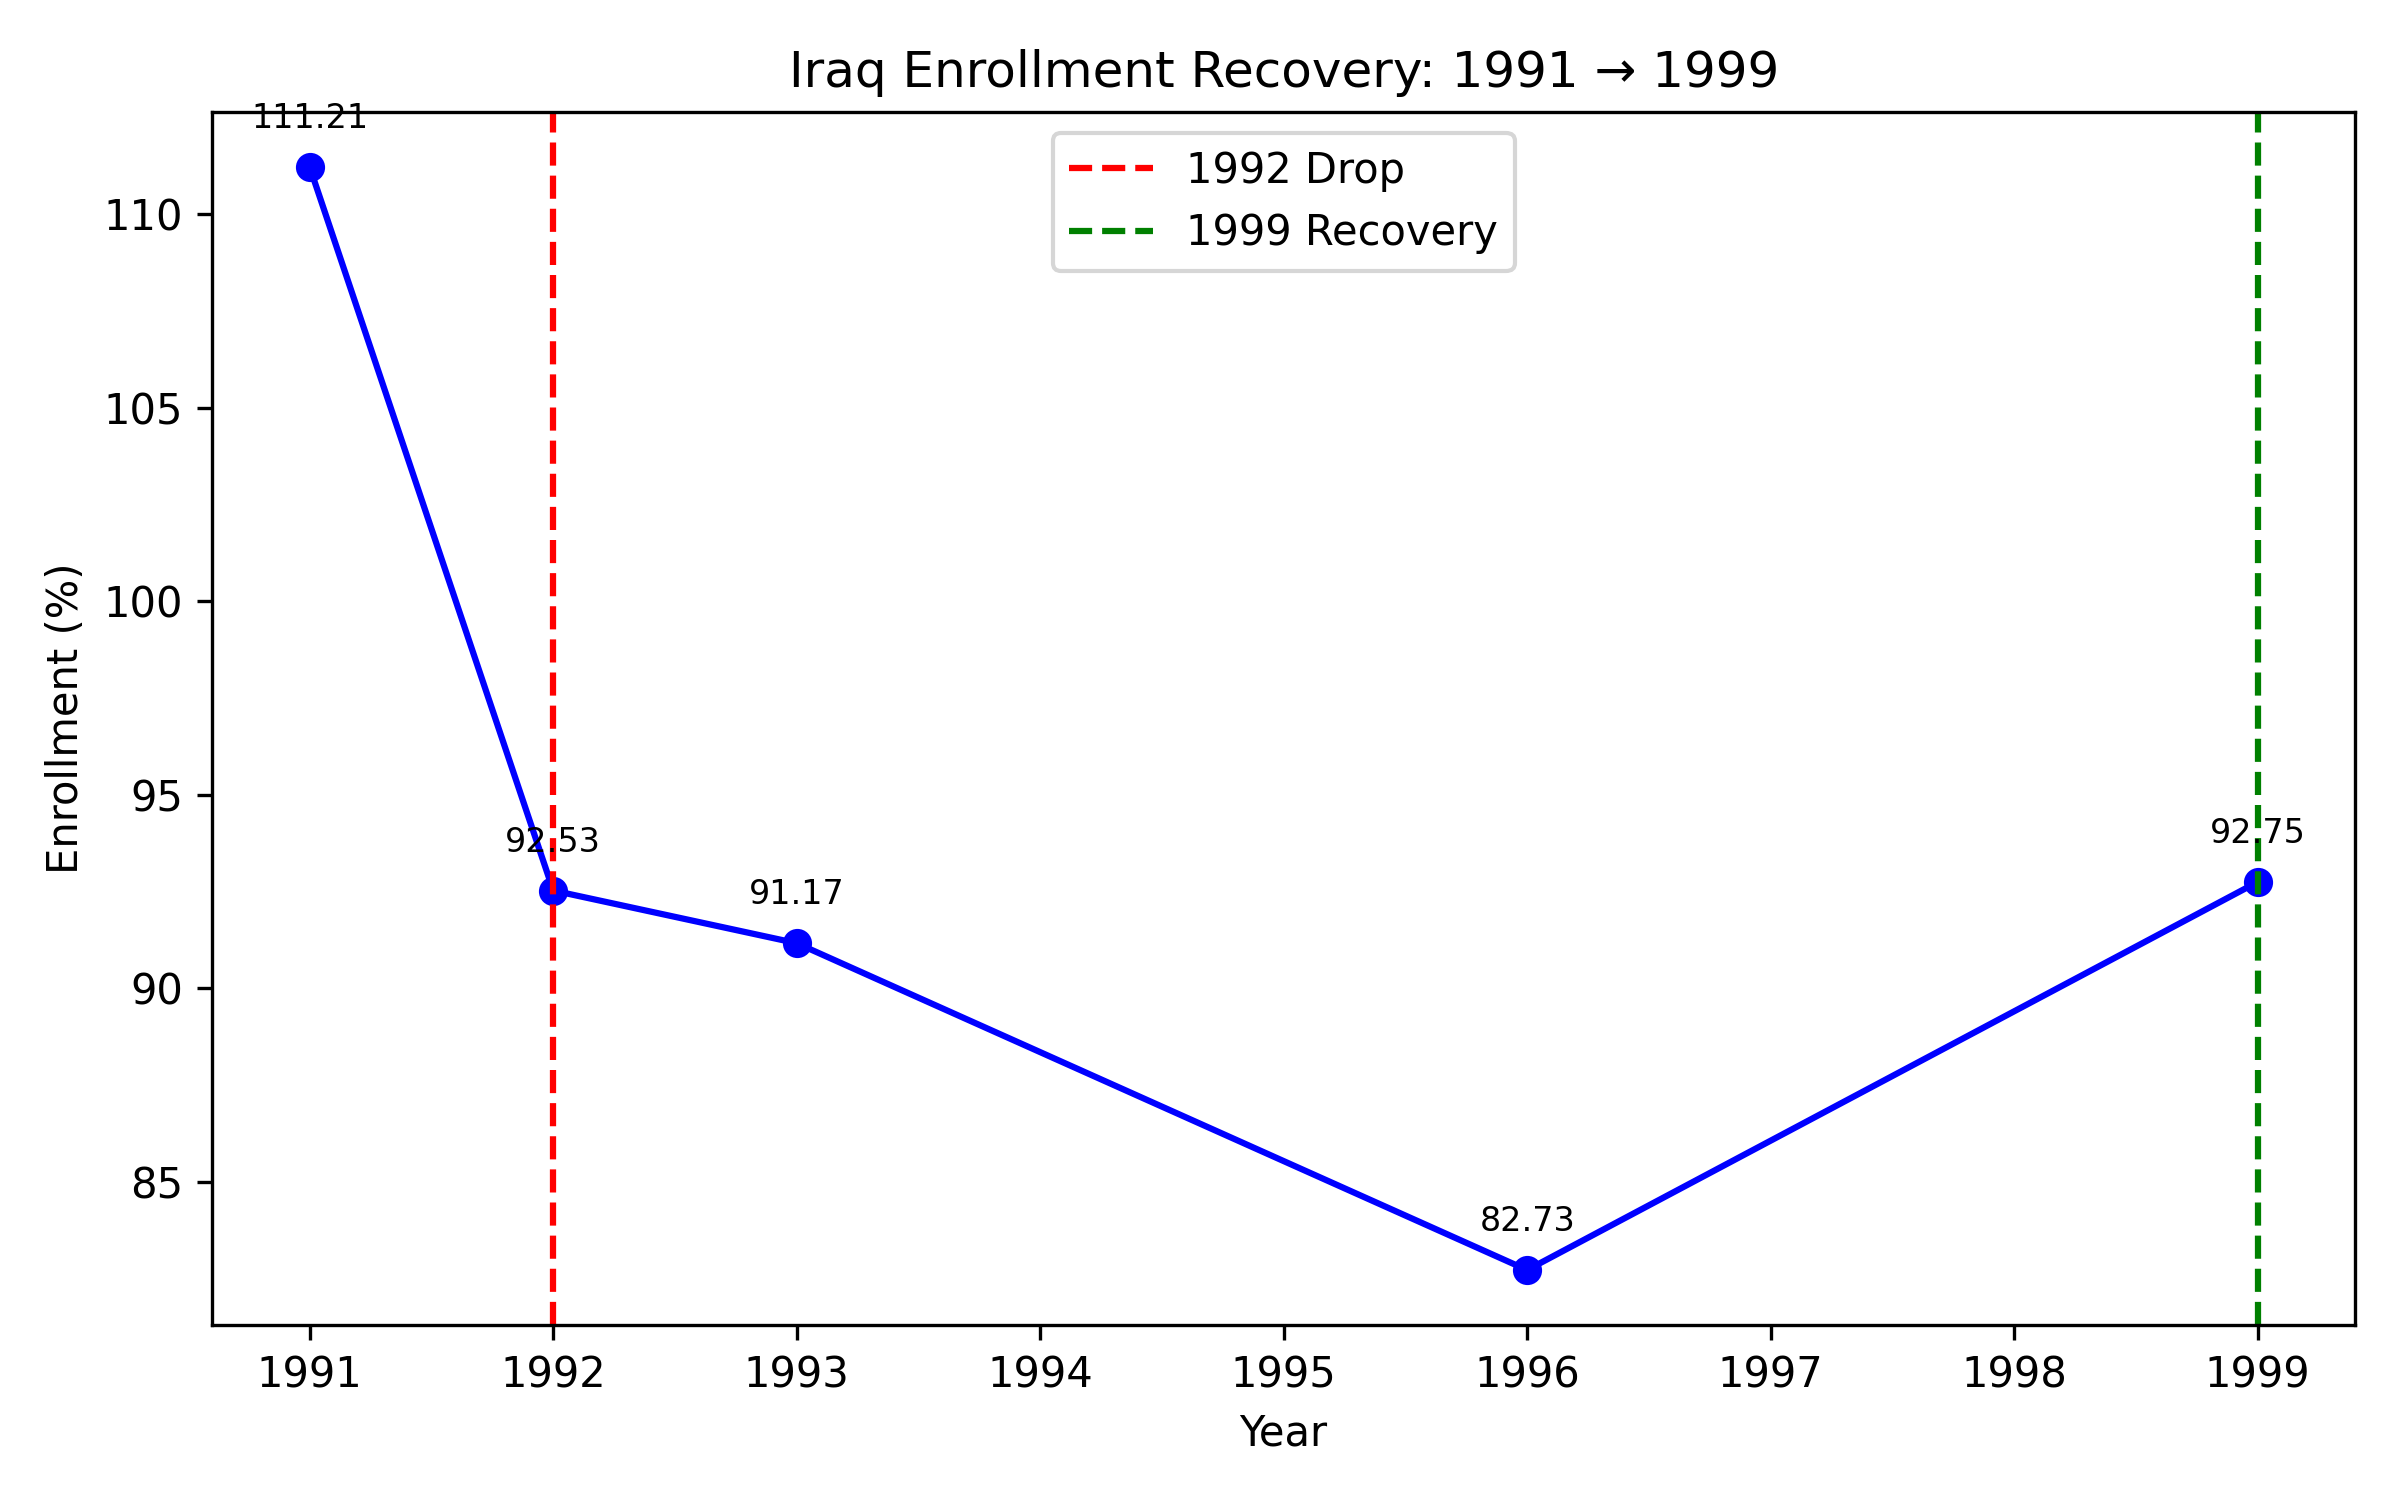

*≈ 2.67 points recovered per year.*

---

In [1]:
from IPython.display import display, Markdown, Image

# Helper to show a titled image with optional caption
def show(title, path, caption=None):
    display(Markdown(f"### {title}"))
    display(Image(filename=path))
    if caption:
        display(Markdown(f"*{caption}*"))
    display(Markdown("---"))

display(Markdown("# 📷 Visual Gallery (Core 9)"))

# Core visuals (results/)
show("Overall Trend", "results/enrollment_trend.png", "Iraq primary enrollment (% gross) over time.")
show("Trend with Regression", "results/enrollment_trend_regression.png", "Linear trend line (slope).")
show("Trend with Mean Line", "results/enrollment_trend_with_mean.png", "Overall average across all years.")
show("Highest vs Lowest Years", "results/enrollment_highest_lowest.png", "Peak 1991 vs trough 1971 in this dataset.")
show("Decade Average", "results/enrollment_decade_average.png", "Average enrollment by decade.")
show("Year-over-Year Change", "results/enrollment_yoy_change.png", "Largest increase 1979; largest drop 1992.")
show("Average (Card)", "results/enrollment_average.png", "Overall average = 93.26%.")
show("Distribution (Mean vs Median)", "results/enrollment_distribution.png", "Mean 93.26% vs median 95.58%.")
show("Recovery 1992 → 1999", "results/enrollment_recovery_1992_1999.png", "Recovered to 1992 level by 1999.")

display(Markdown("# 🔎 Bonus Insights Gallery"))

# Bonus visuals (results/bonus_insights/)
show("Before vs After 1990", "results/bonus_insights/enrollment_pre_post_1990.png", "Pre-1990 = 92.42%, Post-1990 = 95.04%.")
show("CAGR to Peak (1971→1991)", "results/bonus_insights/enrollment_cagr_peak.png", "CAGR ≈ 2.34% per year to peak.")
show("Decade Volatility", "results/bonus_insights/enrollment_decade_volatility.png", "Most volatile: 1970s; least: 1980s.")
show("1991→1992 Peak-to-Drop", "results/bonus_insights/enrollment_peak_drop.png", "Drop = 18.68 points (–16.8%).")
show("Resilience Index (Recovery Speed)", "results/bonus_insights/enrollment_resilience.png", "≈ 2.67 points recovered per year.")